# Lending Club Case Study

## problem Statement:

You work for a consumer finance company which specialises in lending various types of loans to urban customers. 
When the company receives a loan application, the company has to make a decision for loan approval based on the 
applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to 
a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. 
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking 
actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Import required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Read the CSV file provided for loan

In [9]:
loan = pd.read_csv('loan.csv')

In [10]:
loan.shape

(39717, 111)

In [11]:
loan.duplicated().sum()

0

In [12]:
loan_all_null = loan.columns[loan.isna().all()].tolist()

### Data cleaning  - Column cleaning 

In [14]:
loan.drop(columns = loan_all_null, inplace = True)

In [15]:
loan.shape

(39717, 57)

In [16]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [17]:
loan.isna().sum()*100/len(loan)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [18]:
#Remove the columns having nulls more than 30% of the data
loan_drop_columns_percent_null = loan.columns[(loan.isna().sum()*100/len(loan))>=30].str.strip().tolist()
print(loan_drop_columns_percent_null)

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


In [19]:
loan = loan.drop(columns = loan_drop_columns_percent_null)
loan.shape

(39717, 53)

In [20]:
#Check if all the columns having more than 30%null are dropped or not
for i in loan_drop_columns_percent_null:
    print(loan.columns[loan.columns.str.contains(i)])

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


In [21]:
#Check the remaining null columns
print(loan.isnull().all(axis=0).sum())

0


In [22]:
columns_with_nulls = loan.columns[(loan.isna().sum()*100/len(loan))>0]

In [23]:
loan[columns_with_nulls].isna().sum()

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [24]:
#Drop Emp_title due to the high values of the null value in categorical column
loan.drop(columns = 'emp_title',inplace = True)

In [25]:
#removing 
loan.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [26]:
loan.emp_length = loan.emp_length.str.strip('years')

In [27]:
loan.emp_length = loan.emp_length.str.strip('<')
loan.emp_length = loan.emp_length.str.replace('+','')
loan.emp_length = loan.emp_length.str.replace(' ','')

In [28]:
loan.emp_length.value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [29]:
print(loan.emp_length.dropna().astype('int32').mean())
print(loan.emp_length.dropna().astype('int32').median())

5.092050100926453
4.0


In [30]:
#filling the value of the nulls with median
loan.emp_length.fillna(4.0,inplace = True)

In [31]:
#Check the null values
loan.isna().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
url                             0
purpose                         0
title                          11
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util    

In [32]:
print(loan.pub_rec_bankruptcies.value_counts())
print(loan.pub_rec_bankruptcies.dropna().median())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64
0.0


In [33]:
loan.pub_rec_bankruptcies.fillna(0.0,inplace = True)

In [34]:
loan.title.mode()

0    Debt Consolidation
Name: title, dtype: object

In [35]:
loan.title = loan.title.fillna('Debt Consolidation')

In [36]:
loan.revol_util = loan.revol_util.str.replace('%','')

In [37]:
print(loan.revol_util.astype('float').mean())
print(loan.revol_util.astype('float').median())

48.83215241888723
49.3


In [38]:
loan.revol_util = loan.revol_util.fillna(49.3)

In [39]:
#Not useful column for the default payment analysis
loan.drop(columns = ['last_pymnt_d','tax_liens','chargeoff_within_12_mths',
                     'collections_12_mths_ex_med','last_credit_pull_d','initial_list_status','url'],inplace = True)

In [40]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prnc

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [42]:
loan.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [43]:
loan.int_rate = loan.int_rate.str.replace('%','').astype('float')

In [44]:
#final shape of the loan 
loan.shape

(39717, 45)

In [45]:
pd.set_option('display.max_columns', None)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0,0.0


### Derived columns

In [47]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month


In [48]:
# Annual income categories, interest rate categories
loan.annual_inc.value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

In [49]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [50]:
#finding outlier for annual income
print(loan.annual_inc.quantile(0.05))
print(loan.annual_inc.quantile(0.95))
#Remove the outlier with 5-95 rule of outliers
loan = loan[(loan.annual_inc >=loan.annual_inc.quantile(0.05)) & (loan.annual_inc <=loan.annual_inc.quantile(0.95))]

24000.0
142000.0


In [51]:
print(loan.shape)
loan.annual_inc.describe()

(35940, 47)


count     35940.000000
mean      63240.818464
std       26722.628739
min       24000.000000
25%       42000.000000
50%       58898.000000
75%       80000.000000
max      142000.000000
Name: annual_inc, dtype: float64

In [52]:
def annual_inc_cat(annual_inc):
    if annual_inc < 24000:
        return '0-24K'
    elif annual_inc >= 24000 and annual_inc < 40000:
        return '24K-40K'
    elif annual_inc >= 40000 and annual_inc < 60000:
        return '40K-60K'
    elif annual_inc >= 60000 and annual_inc < 80000:
        return '60K-80K'
    elif annual_inc >= 80000 and annual_inc < 140000:
        return '80K-140K'
    elif annual_inc >= 140000 :
        return '140K'
loan['annual_inc_cat'] = loan['annual_inc'].apply(lambda x: annual_inc_cat(x))

<Axes: xlabel='annual_inc_cat'>

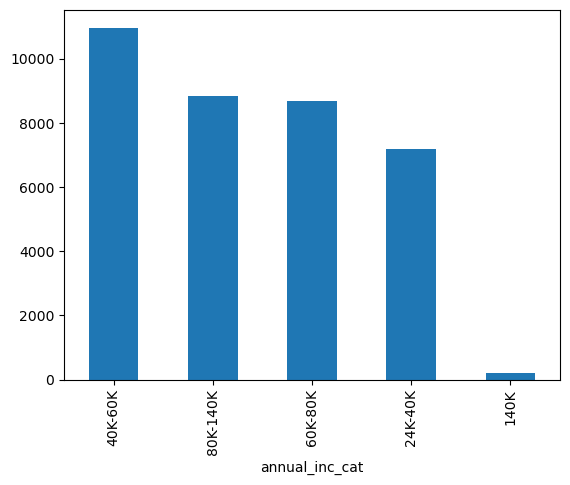

In [53]:
loan['annual_inc_cat'].value_counts().plot.bar()

<Axes: >

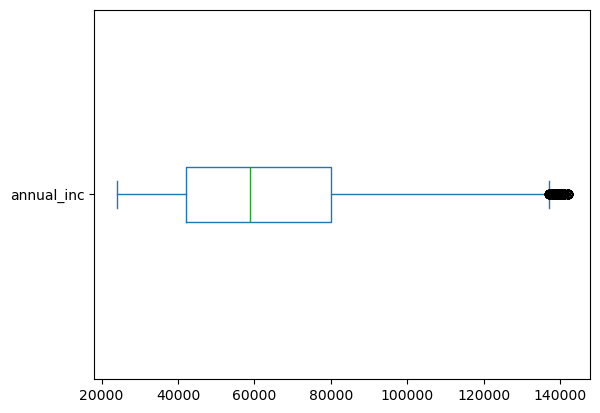

In [54]:
loan['annual_inc'].plot.box(vert=False)

In [55]:
#Converting all the int and float columns to the numeric 
col_numeric = loan.select_dtypes(include = ['int64','float64']).columns.to_list()
loan[col_numeric].apply(pd.to_numeric)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0,1,3,0,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0,5,3,0,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0,1,10,0,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0,0,15,0,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,7.90,156.46,36000.0,11.20,0,3,9,0,7963,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39709,92533,92529,5000,5000,675.0,11.22,164.23,80000.0,1.21,0,3,15,1,27185,29,0.00,0.00,5912.052998,798.13,5000.00,912.05,0.00,0.00,0.00,165.17,1,0,0,0.0
39710,92507,92502,5000,5000,250.0,7.43,155.38,85000.0,0.31,0,0,7,0,216,19,0.00,0.00,5593.626092,279.68,5000.00,593.63,0.00,0.00,0.00,156.29,1,0,0,0.0
39711,92402,92390,5000,5000,700.0,8.70,158.30,75000.0,15.55,0,0,10,0,66033,29,0.00,0.00,5698.603286,797.80,5000.00,698.60,0.00,0.00,0.00,159.83,1,0,0,0.0
39712,92187,92174,2500,2500,1075.0,8.07,78.42,110000.0,11.33,0,0,13,0,7274,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,1,0,0,0.0


In [56]:
col_numeric = list(filter(lambda x: x not in ['id','member_id'], col_numeric))
col_numeric

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'policy_code',
 'acc_now_delinq',
 'delinq_amnt',
 'pub_rec_bankruptcies']

Descriptive analysis for loan_amnt
count    35940.000000
mean     11170.496661
std       7162.391367
min        500.000000
25%       5825.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


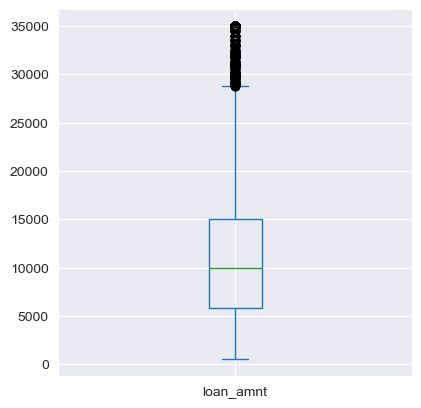

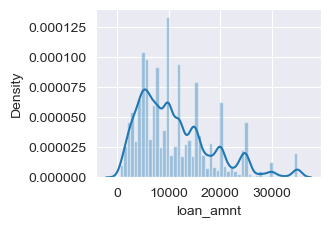

Descriptive analysis for funded_amnt
count    35940.000000
mean     10904.824708
std       6903.108175
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


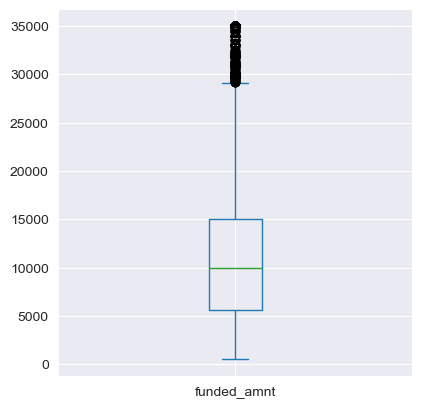

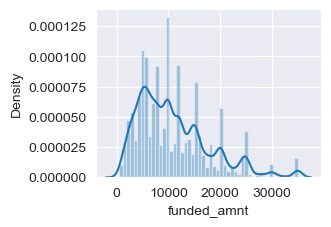

Descriptive analysis for funded_amnt_inv
count    35940.000000
mean     10358.283808
std       6852.596365
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14200.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


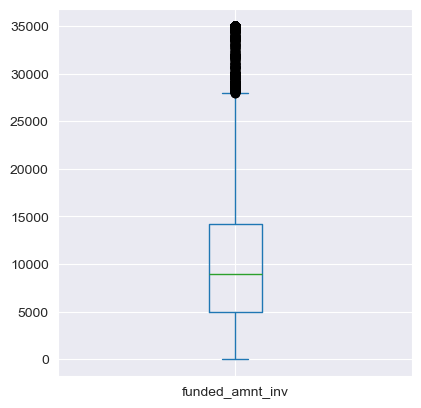

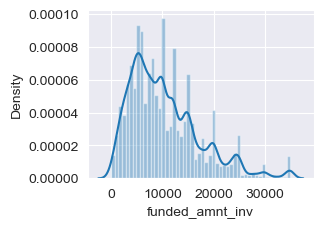

Descriptive analysis for int_rate
count    35940.000000
mean        11.984632
std          3.712117
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64


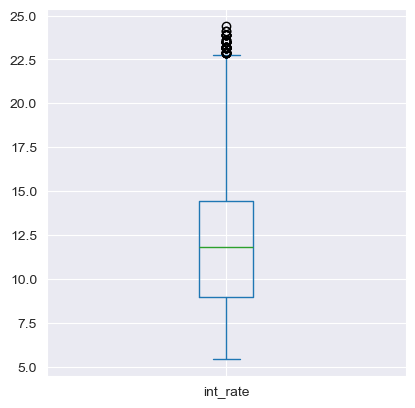

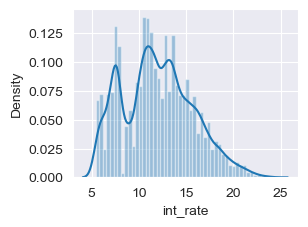

Descriptive analysis for installment
count    35940.000000
mean       322.779625
std        199.731689
min         16.080000
25%        171.132500
50%        283.405000
75%        424.602500
max       1305.190000
Name: installment, dtype: float64


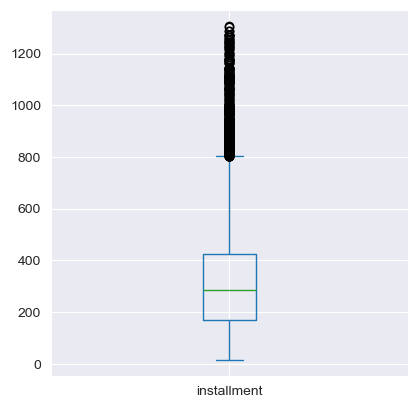

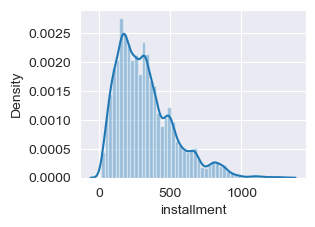

Descriptive analysis for annual_inc
count     35940.000000
mean      63240.818464
std       26722.628739
min       24000.000000
25%       42000.000000
50%       58898.000000
75%       80000.000000
max      142000.000000
Name: annual_inc, dtype: float64


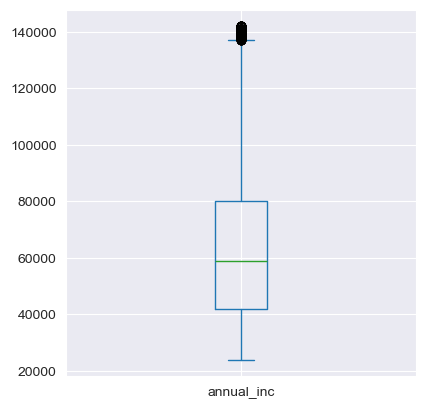

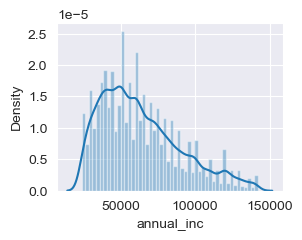

Descriptive analysis for dti
count    35940.000000
mean        13.555674
std          6.640927
min          0.000000
25%          8.500000
50%         13.700000
75%         18.800000
max         29.990000
Name: dti, dtype: float64


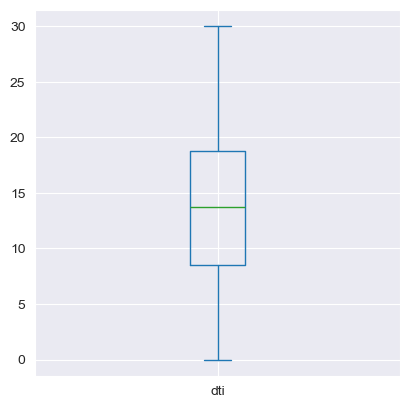

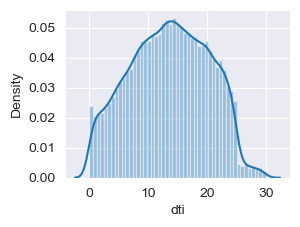

Descriptive analysis for delinq_2yrs
count    35940.000000
mean         0.145910
std          0.492546
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


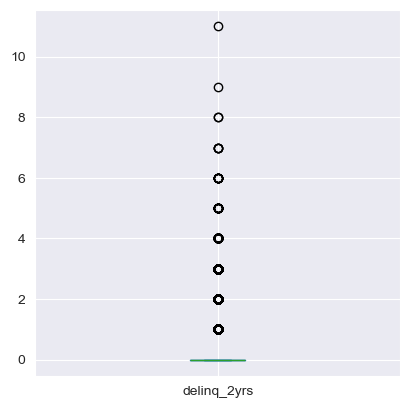

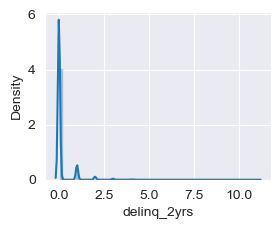

Descriptive analysis for inq_last_6mths
count    35940.000000
mean         0.865109
std          1.065798
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


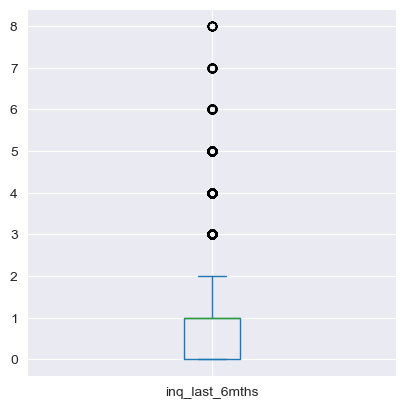

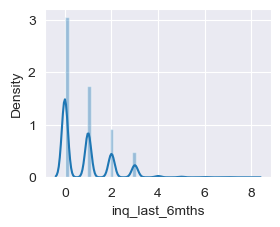

Descriptive analysis for open_acc
count    35940.000000
mean         9.336199
std          4.338897
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


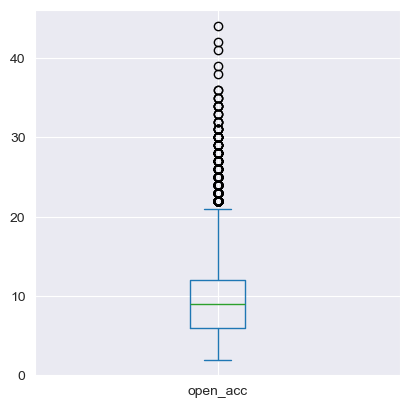

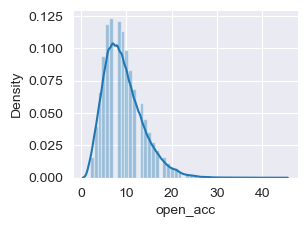

Descriptive analysis for pub_rec
count    35940.000000
mean         0.056622
std          0.239750
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


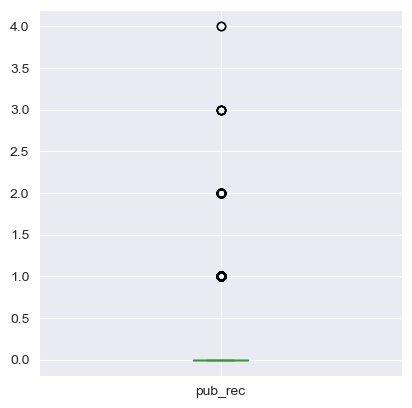

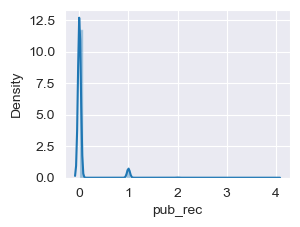

Descriptive analysis for revol_bal
count     35940.000000
mean      12841.344658
std       13989.291860
min           0.000000
25%        3919.000000
50%        9028.500000
75%       16831.250000
max      149000.000000
Name: revol_bal, dtype: float64


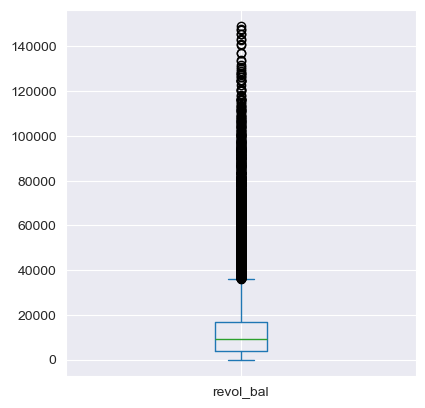

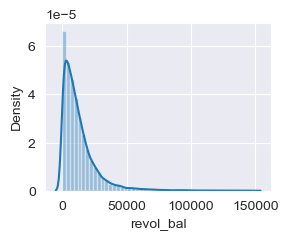

Descriptive analysis for total_acc
count    35940.000000
mean        22.179215
std         11.130986
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


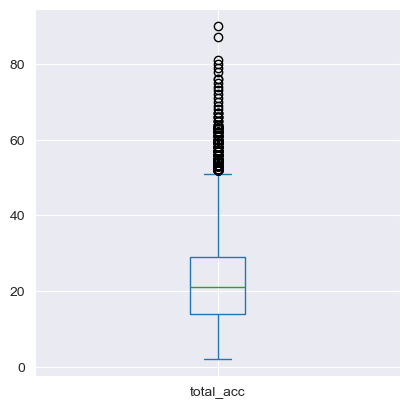

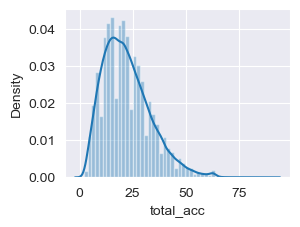

Descriptive analysis for out_prncp
count    35940.000000
mean        50.509046
std        367.354783
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64


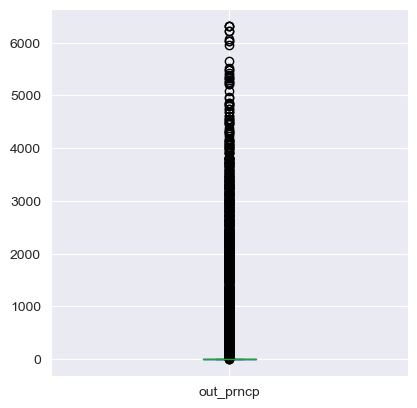

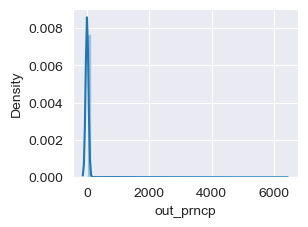

Descriptive analysis for out_prncp_inv
count    35940.000000
mean        50.269819
std        366.026785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64


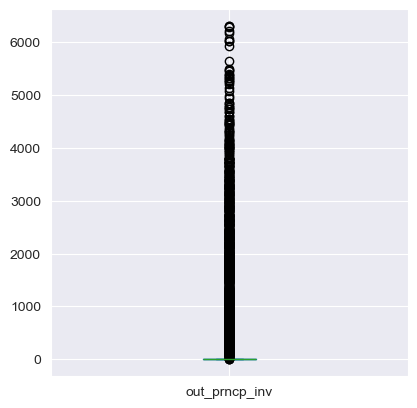

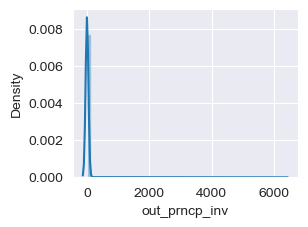

Descriptive analysis for total_pymnt
count    35940.000000
mean     12072.191165
std       8672.557459
min          0.000000
25%       5717.959443
50%      10055.241925
75%      16385.176600
max      58563.679930
Name: total_pymnt, dtype: float64


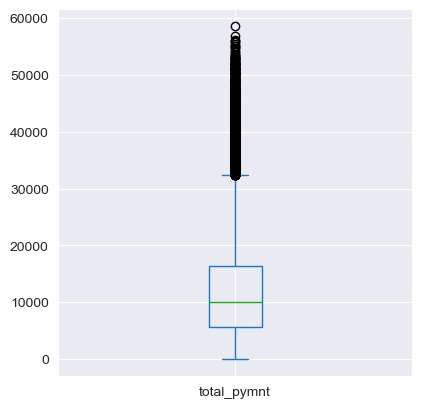

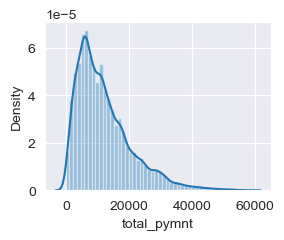

Descriptive analysis for total_pymnt_inv
count    35940.000000
mean     11491.947384
std       8584.619578
min          0.000000
25%       5312.267500
50%       9435.695000
75%      15649.857500
max      58563.680000
Name: total_pymnt_inv, dtype: float64


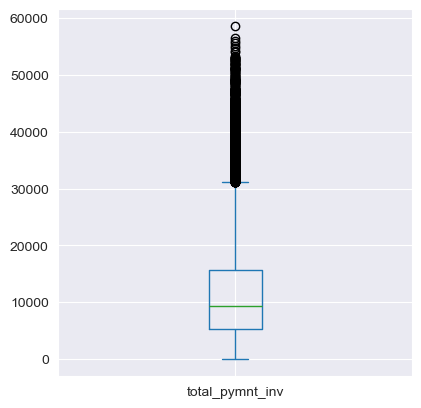

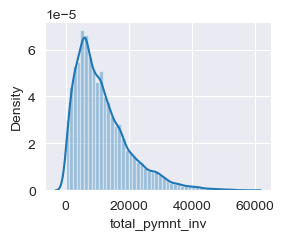

Descriptive analysis for total_rec_prncp
count    35940.000000
mean      9735.458659
std       6782.493436
min          0.000000
25%       4800.000000
50%       8000.000000
75%      13250.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64


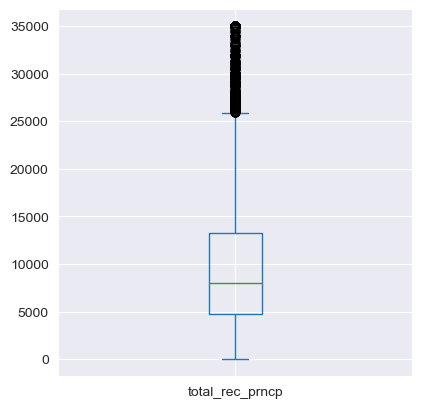

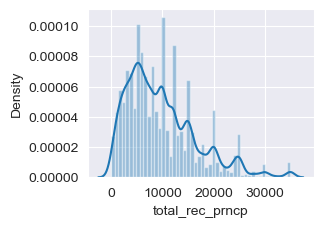

Descriptive analysis for total_rec_int
count    35940.000000
mean      2241.162264
std       2514.803750
min          0.000000
25%        681.487500
50%       1371.870000
75%       2815.180000
max      23563.680000
Name: total_rec_int, dtype: float64


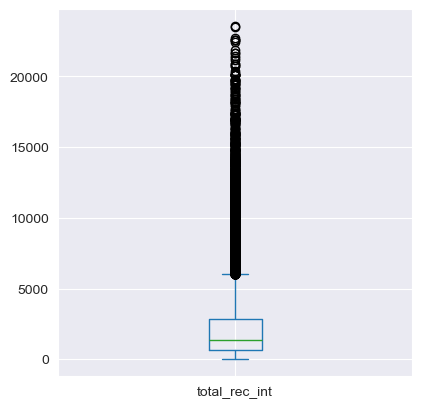

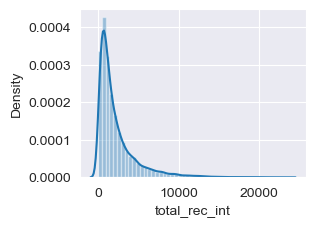

Descriptive analysis for total_rec_late_fee
count    35940.000000
mean         1.293941
std          7.067541
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64


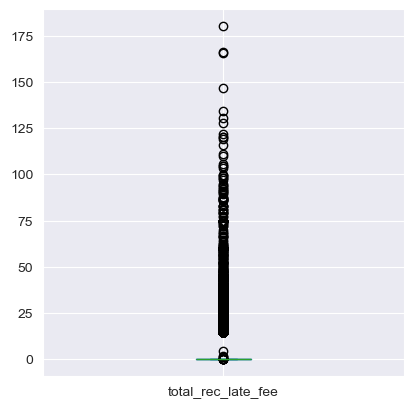

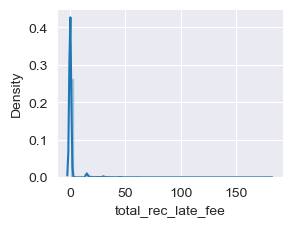

Descriptive analysis for recoveries
count    35940.000000
mean        94.276378
std        682.737432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64


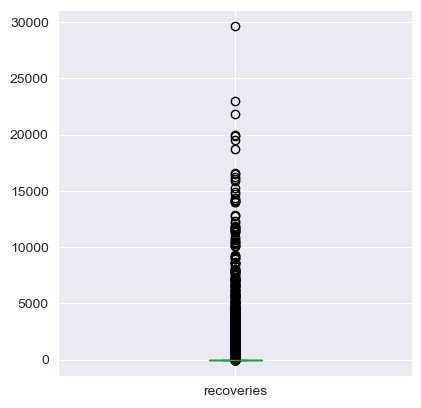

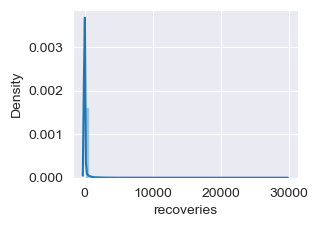

Descriptive analysis for collection_recovery_fee
count    35940.000000
mean        11.985284
std        145.633965
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64


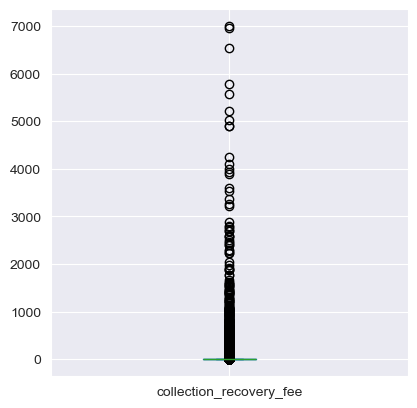

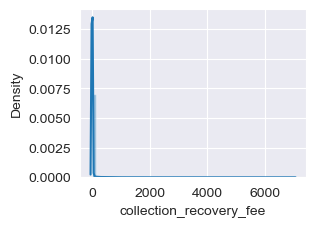

Descriptive analysis for last_pymnt_amnt
count    35940.000000
mean      2657.793654
std       4338.409333
min          0.000000
25%        226.310000
50%        549.625000
75%       3358.257500
max      36115.200000
Name: last_pymnt_amnt, dtype: float64


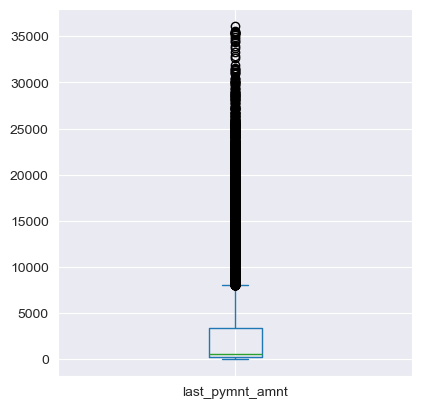

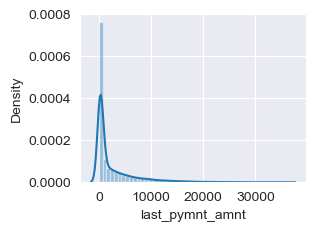

Descriptive analysis for policy_code
count    35940.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64


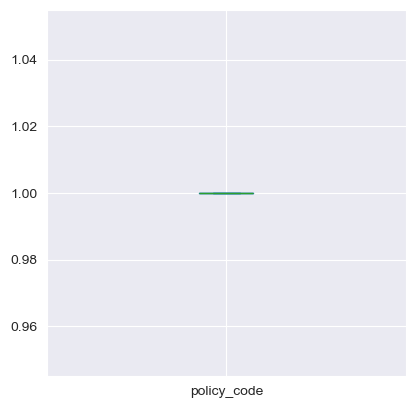

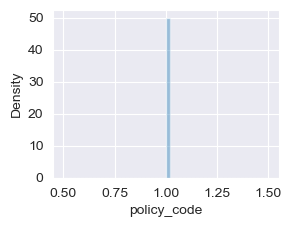

Descriptive analysis for acc_now_delinq
count    35940.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64


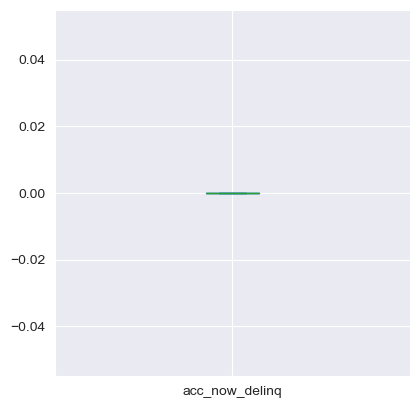

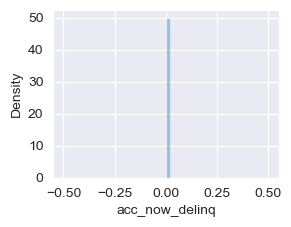

Descriptive analysis for delinq_amnt
count    35940.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64


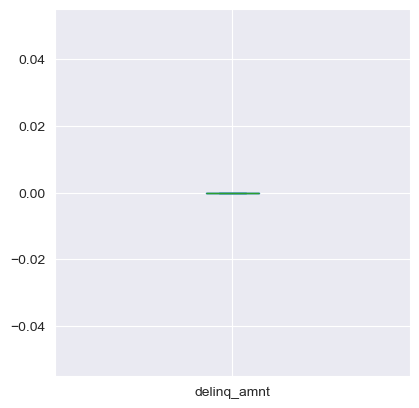

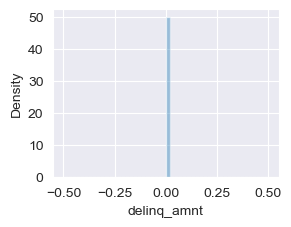

Descriptive analysis for pub_rec_bankruptcies
count    35940.000000
mean         0.043851
std          0.205580
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


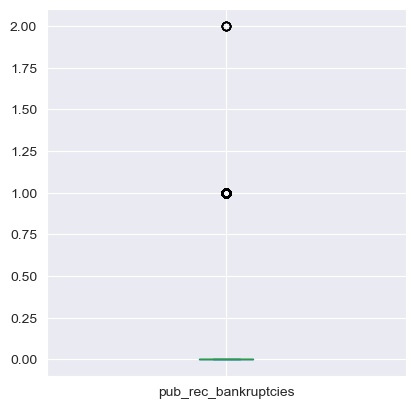

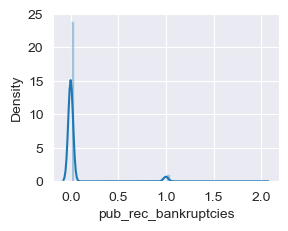

In [57]:
#analysis of the different numeric columns
for value in col_numeric:
    print(f'Descriptive analysis for {value}')
    print(loan[value].describe())
    plt.figure(figsize=(8,8),layout = 'tight')
    sns.set_style(style = 'darkgrid')
    plt.subplot(2,2,1)
    ax = loan[value].plot.box(vert = True)
    plt.show()
    plt.subplot(2,2,2)
    ax = sns.distplot(loan[value])
    plt.xlabel(value)
    plt.show()

In [548]:
# Based on above analysis following columns are not adding any value to the analysis

loan.drop(columns = ['delinq_2yrs', 'inq_last_6mths', 'policy_code', 'acc_now_delinq','delinq_amnt','pymnt_plan','title','zip_code','application_type'], inplace = True)

KeyError: "['delinq_2yrs', 'inq_last_6mths', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'pymnt_plan', 'title', 'zip_code'] not found in axis"

In [550]:
loan.drop(columns = ['application_type'], inplace = True)

In [462]:
loan.shape

(35940, 44)

In [60]:
col_numeric = list(filter(lambda x: x not in ['delinq_2yrs', 'inq_last_6mths', 'policy_code', 'acc_now_delinq','delinq_amnt'], col_numeric))
col_numeric

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

In [61]:
loan[col_numeric].corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.980945,0.936884,0.310088,0.926484,0.363305,0.091439,0.140569,-0.048787,0.296573,0.209146,0.192800,0.192447,0.877571,0.843663,0.839710,0.723930,0.048123,0.138519,0.072293,0.436650,-0.033412
funded_amnt,0.980945,1.000000,0.955717,0.314944,0.953326,0.358590,0.090875,0.138466,-0.049938,0.288563,0.203579,0.194558,0.194253,0.894731,0.860722,0.858314,0.732331,0.050165,0.140717,0.074594,0.441942,-0.034905
funded_amnt_inv,0.936884,0.955717,1.000000,0.307950,0.898670,0.343204,0.098493,0.126839,-0.051733,0.269929,0.196870,0.203465,0.203475,0.871821,0.905992,0.833273,0.724509,0.029466,0.127484,0.059465,0.432369,-0.035676
int_rate,0.310088,0.314944,0.307950,1.000000,0.284255,0.058119,0.120855,0.001316,0.104332,0.083918,-0.059973,0.131559,0.131616,0.307276,0.301894,0.182594,0.533834,0.091868,0.121992,0.064989,0.152462,0.089573
installment,0.926484,0.953326,0.898670,0.284255,1.000000,0.359878,0.078501,0.135516,-0.044260,0.288415,0.182526,0.122482,0.122309,0.846987,0.805079,0.838762,0.625730,0.059265,0.121048,0.074603,0.387707,-0.030826
annual_inc,0.363305,0.358590,0.343204,0.058119,0.359878,1.000000,-0.098488,0.229538,-0.013987,0.377516,0.347071,0.050610,0.050329,0.344588,0.331517,0.346748,0.242982,0.012155,0.037357,0.019703,0.193975,-0.009649
dti,0.091439,0.090875,0.098493,0.120855,0.078501,-0.098488,1.000000,0.299889,-0.007352,0.271739,0.245656,0.042559,0.042490,0.089360,0.095277,0.065055,0.125654,-0.011804,0.026115,0.010434,0.017844,0.005180
open_acc,0.140569,0.138466,0.126839,0.001316,0.135516,0.229538,0.299889,1.000000,0.004329,0.272845,0.674429,0.021782,0.021589,0.124904,0.115680,0.123390,0.093941,-0.015649,0.014960,0.003457,0.059734,0.009613
pub_rec,-0.048787,-0.049938,-0.051733,0.104332,-0.044260,-0.013987,-0.007352,0.004329,1.000000,-0.062277,-0.022497,-0.015602,-0.015870,-0.052208,-0.053141,-0.064797,-0.003837,0.000724,-0.005332,-0.006298,-0.029545,0.846113
revol_bal,0.296573,0.288563,0.269929,0.083918,0.288415,0.377516,0.271739,0.272845,-0.062277,1.000000,0.293725,0.058126,0.057872,0.267969,0.252895,0.255897,0.222129,0.004400,0.043523,0.021076,0.104723,-0.048175


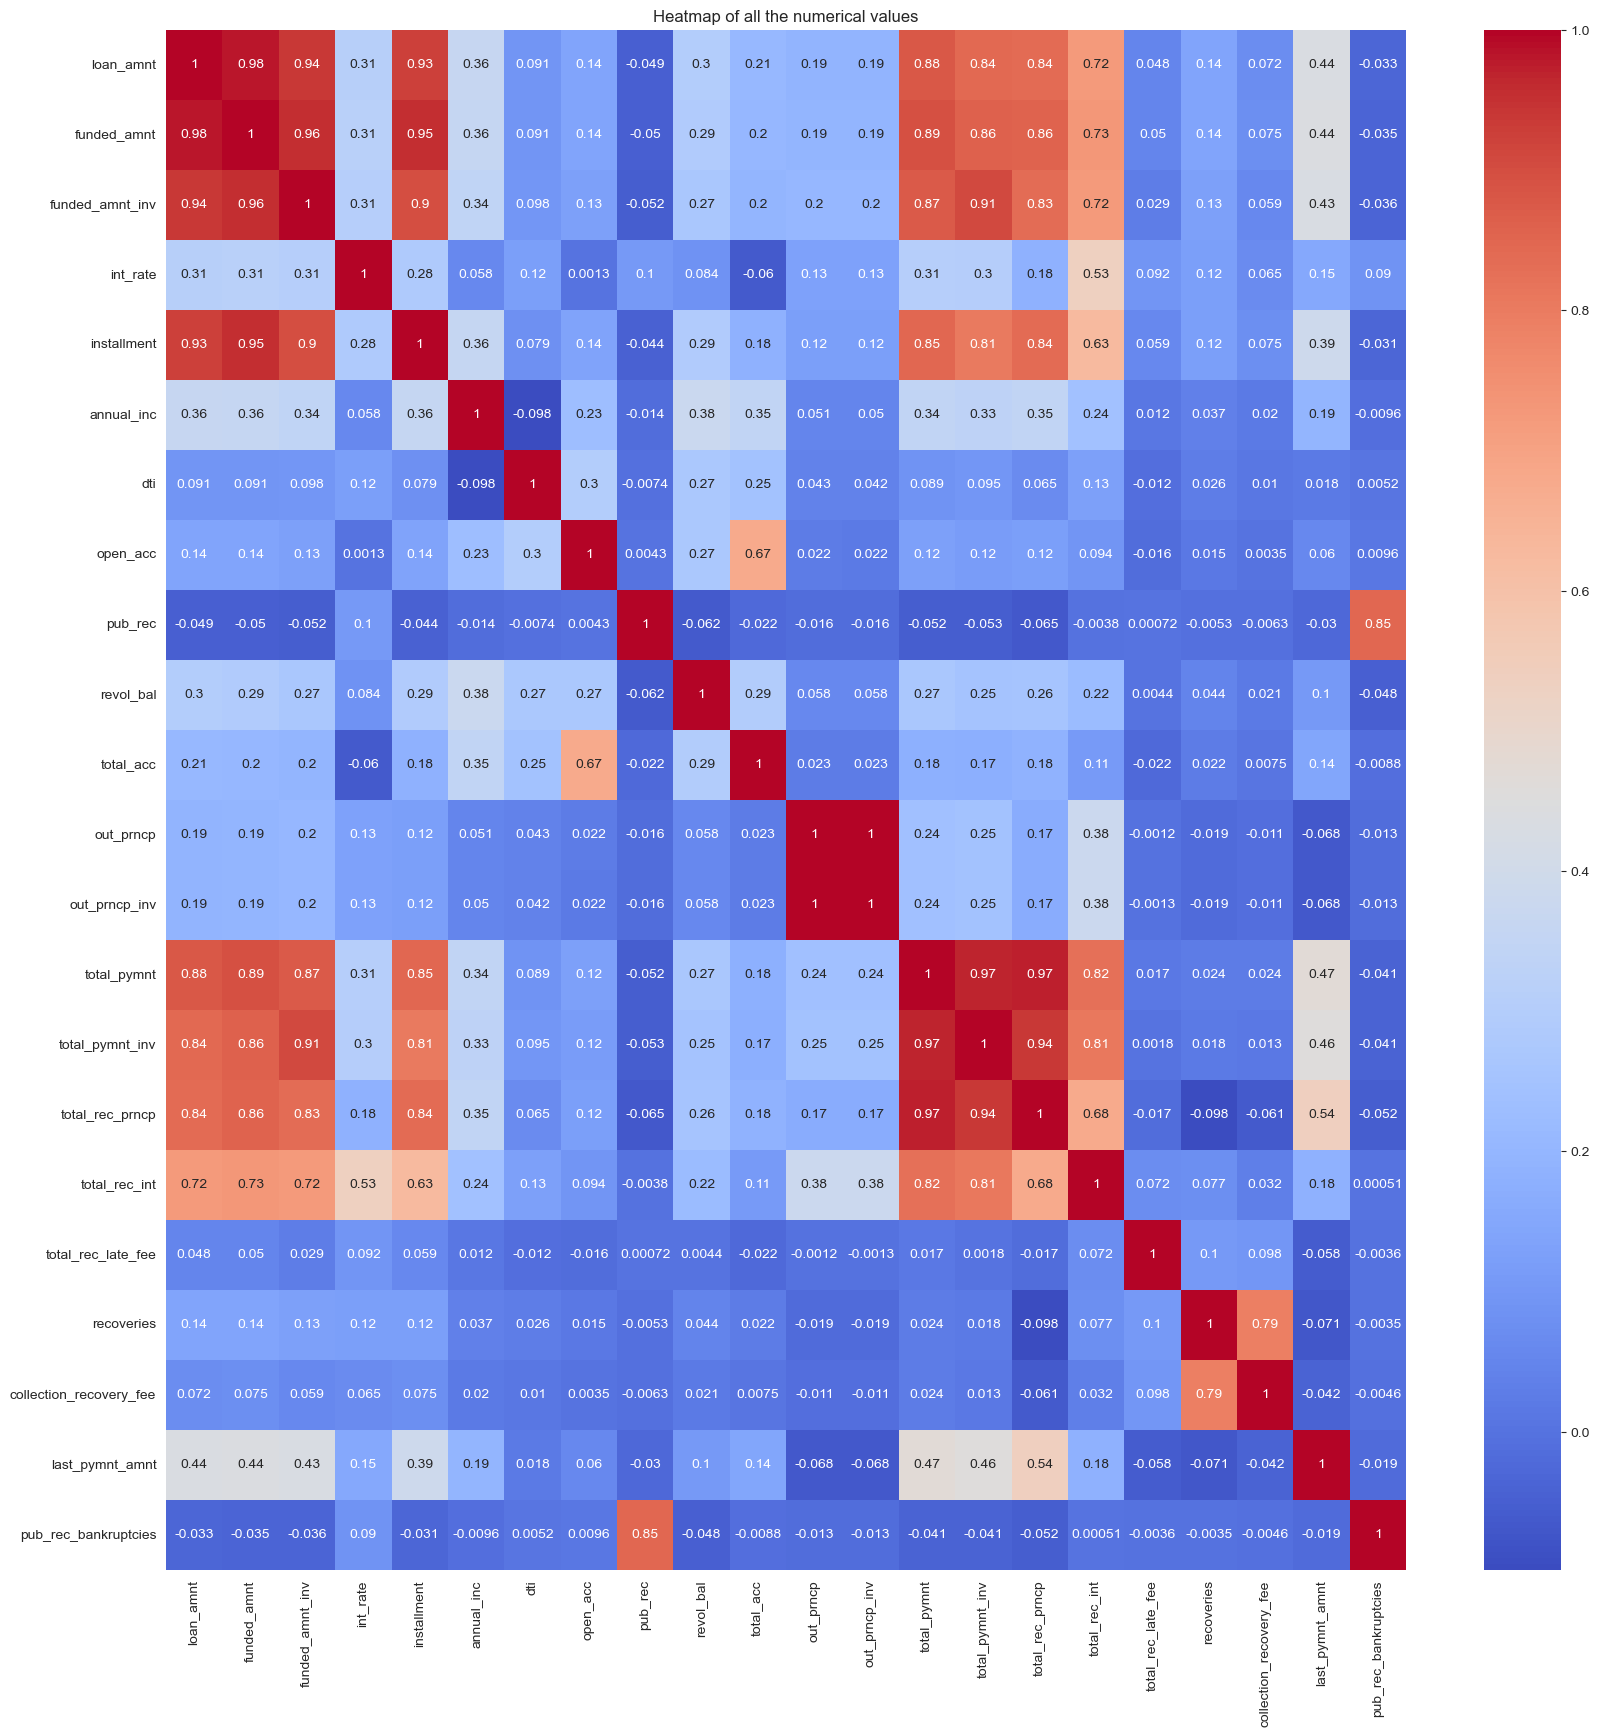

In [62]:
heatmap = sns.heatmap(loan[col_numeric].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
fig = heatmap.get_figure()
fig.set_size_inches(20,20)
plt.title("Heatmap of all the numerical values")
plt.show()

In [598]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-12.5', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


# Bivariate analysis
In this section we will try to analyse the categorical variable and the loan defaulting situation with the help of different plots

In [120]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'application_type', 'pub_rec_bankruptcies', 'year',
       'month', 'annual_inc_cat', 'loan_amnt_cats', 'annual_inc_cats',
       'int_rate_cats', 'dti_cats'],
      dtype='object')

## Loan amounts and defaulters

In [253]:
loan.groupby('loan_status').loan_amnt.sum()

loan_status
Charged Off     62450075
Current         17249200
Fully Paid     321768375
Name: loan_amnt, dtype: int64

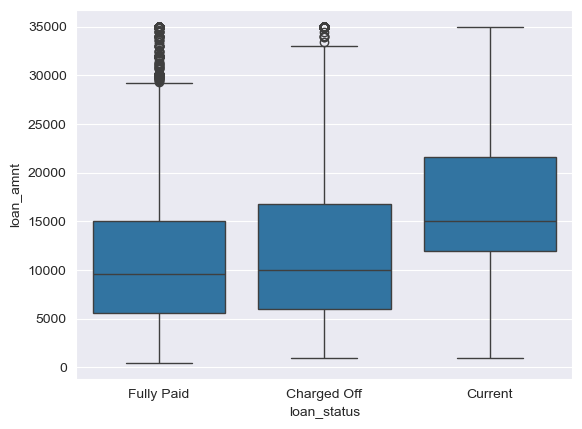

In [265]:
sns.boxplot(y = loan['loan_amnt'],x = loan['loan_status'])
plt.show()

<Axes: xlabel='loan_status'>

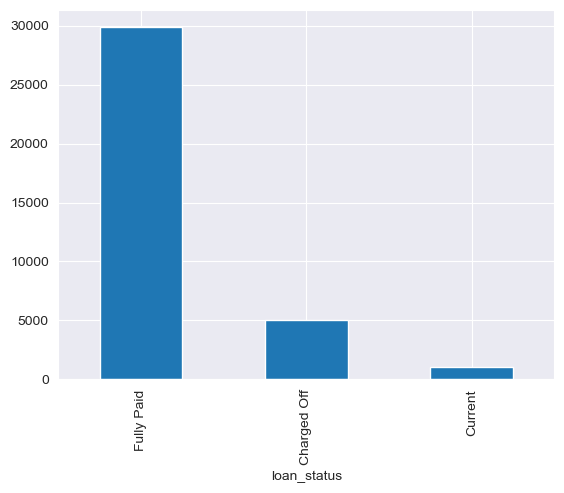

In [275]:
loan.loan_status.value_counts().plot.bar()

In [273]:
loan['id'].value_counts()

id
1077501    1
570180     1
570293     1
570266     1
570275     1
          ..
786611     1
786627     1
786633     1
782786     1
90395      1
Name: count, Length: 35940, dtype: int64

## Yearwise amount analysis

Text(0.5, 1.0, 'Yearwise-Loan amount trend')

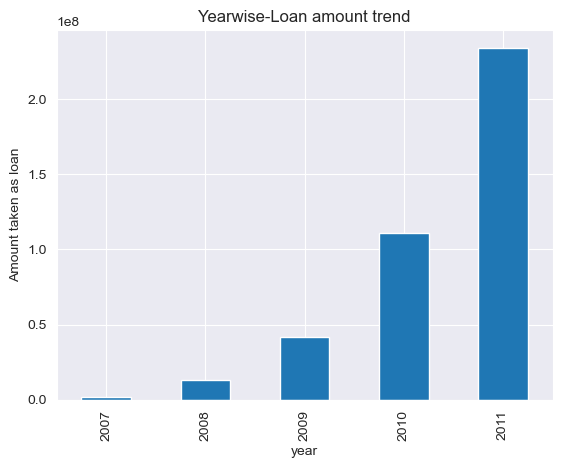

In [132]:
loan.groupby('year')['loan_amnt'].sum().plot.bar()
plt.ylabel('Amount taken as loan')
plt.title('Yearwise-Loan amount trend')

#Observations: The loan amount taken has increased per year since 2007

year
2007    2.975001e+04
2008    1.039656e+05
2009    2.899679e+05
2010    7.323411e+05
2011    2.232268e+06
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'Yearwise-Loan recovery trend')

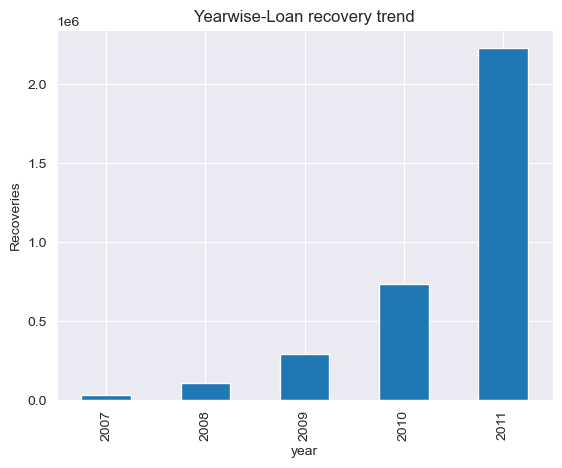

In [494]:
year_loan_analys = loan.groupby('year').recoveries.sum()
print(year_loan_analys)
loan.groupby('year')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('Yearwise-Loan recovery trend')

Text(0.5, 1.0, 'Yearwise salary trend')

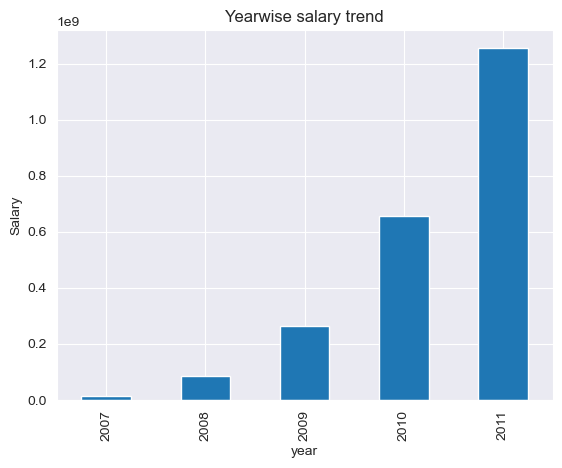

In [138]:
loan.groupby('year')['annual_inc'].sum().plot.bar()
plt.ylabel('Salary')
plt.title('Yearwise salary trend')
# Income of the public is increasing

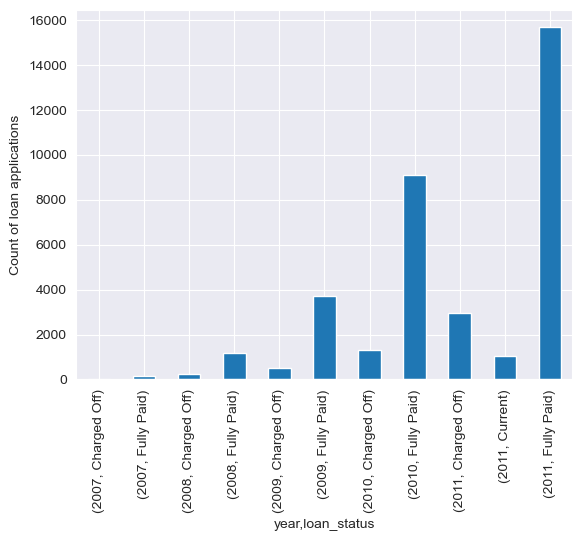

In [292]:
# yearwise count analysis
loan.groupby(['year','loan_status']).id.count().plot(kind='bar')
plt.ylabel('Count of loan applications')
plt.show()

In [236]:
year_loan_analys = loan.groupby(['year','loan_status']).loan_amnt.sum().unstack().fillna(0)
year_loan_analys['total'] = year_loan_analys['Charged Off']+year_loan_analys['Current']+year_loan_analys['Fully Paid']
year_loan_analys['percent_default'] = (year_loan_analys['Charged Off']*100)/year_loan_analys['total']
year_loan_analys

loan_status,Charged Off,Current,Fully Paid,total,percent_default
year,,,,,
2007,415725.0,0.0,1474450.0,1890175.0,21.993995
2008,2495975.0,0.0,10507325.0,13003300.0,19.194935
2009,5587000.0,0.0,36015050.0,41602050.0,13.429627
2010,14504300.0,0.0,96336775.0,110841075.0,13.085672
2011,39447075.0,17249200.0,177434775.0,234131050.0,16.848289


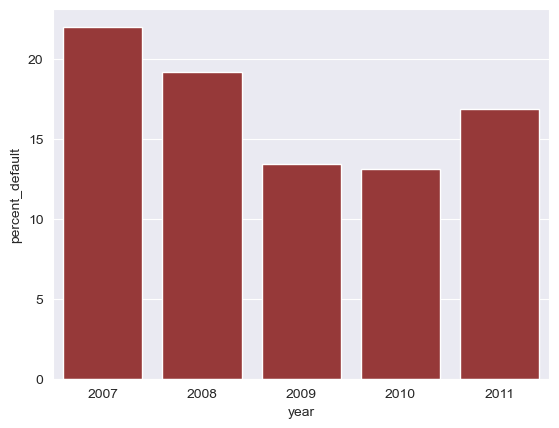

In [240]:
sns.barplot(x = 'year', y = 'percent_default', data = year_loan_analys, color = 'brown')
plt.show()

In [490]:
year_loan_analys = loan.groupby('year').recoveries.sum()
print(year_loan_analys)

year
2007    2.975001e+04
2008    1.039656e+05
2009    2.899679e+05
2010    7.323411e+05
2011    2.232268e+06
Name: recoveries, dtype: float64

## Grade analysis

Text(0.5, 1.0, 'Yearwise-Loan amount trend')

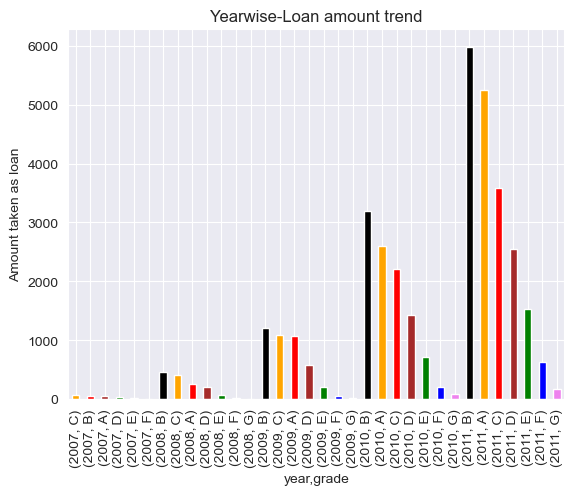

In [164]:
loan.groupby('year')['grade'].value_counts().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount taken as loan')
plt.title('Yearwise-Loan amount trend')
#Yearwise trend suggests that category B is taken more often and the count has increased

<Axes: xlabel='grade'>

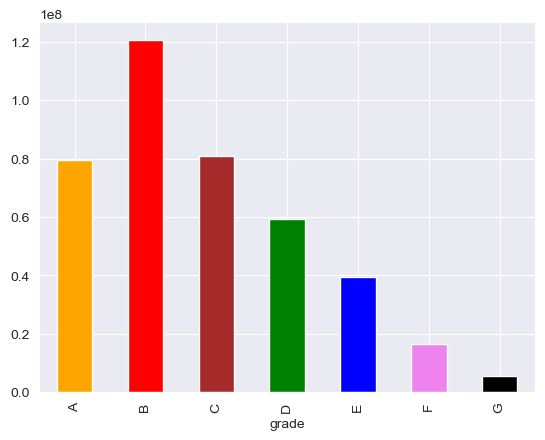

In [172]:
loan.groupby(['grade']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
#Every loan amount category has different popular grades. But in general grade B is more popular

<Axes: xlabel='grade'>

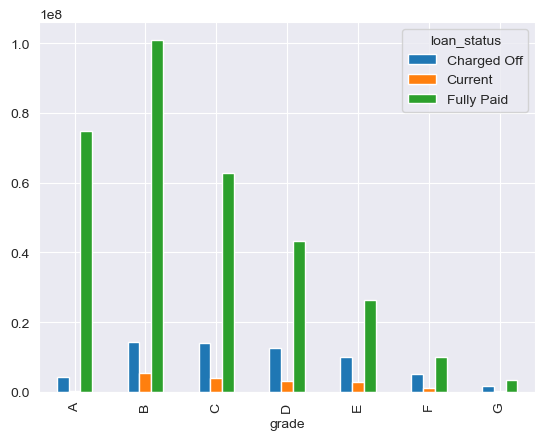

In [282]:
loan.groupby(['grade','loan_status']).loan_amnt.sum().unstack().plot.bar()

In [204]:
grade_loan_anlys = loan.groupby(['grade','loan_status']).loan_amnt.sum().unstack()
grade_loan_anlys['total'] = grade_loan_anlys['Charged Off']+grade_loan_anlys['Current']+grade_loan_anlys['Fully Paid']
grade_loan_anlys['percent_default'] = (grade_loan_anlys['Charged Off']*100)/grade_loan_anlys['total']
grade_loan_anlys

loan_status,Charged Off,Current,Fully Paid,total,percent_default
grade,,,,,
A,4321175,386975,74953150,79661300,5.424434
B,14284025,5426050,100931925,120642000,11.840010
C,14109850,3990700,62820400,80920950,17.436585
D,12711775,3160100,43268350,59140225,21.494296
E,10024250,2847175,26447850,39319275,25.494493
F,5287750,1149275,9951975,16389000,32.264019
G,1711250,288925,3394725,5394900,31.719772


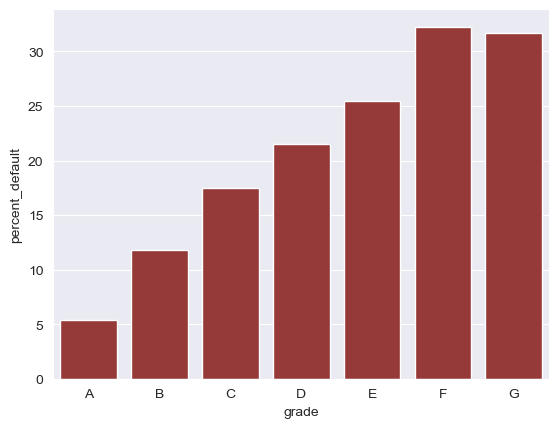

In [220]:
sns.barplot(x = 'grade', y = 'percent_default', data = grade_loan_anlys, color = 'brown')
plt.show()

grade
A    190175.495281
B    626717.921585
C    783828.414523
D    669249.871120
E    600520.330000
F    401085.718838
G    116715.280000
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'Gradewise-Loan recovery trend')

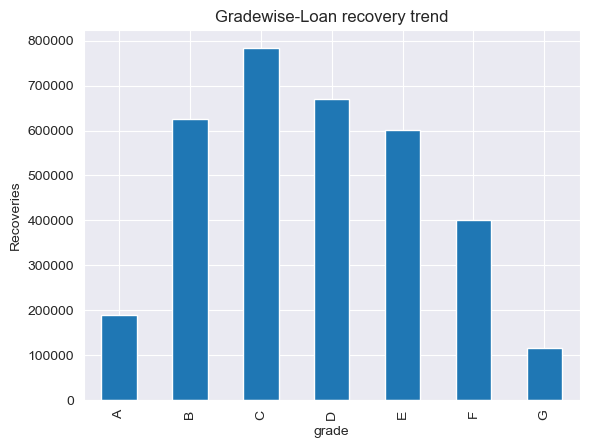

In [498]:
grade_loan_analys = loan.groupby('grade').recoveries.sum()
print(grade_loan_analys)
loan.groupby('grade')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('Gradewise-Loan recovery trend')

## Interest rate and loan status

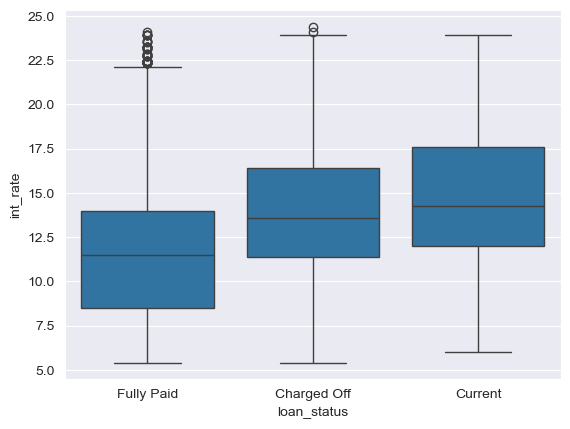

In [295]:
sns.boxplot(y = loan['int_rate'],x = loan['loan_status'])
plt.show()

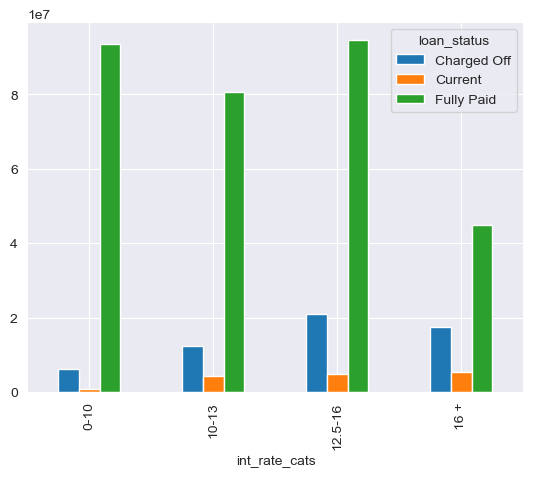

In [311]:
# interest rate loan amount analysis
loan.groupby(['int_rate_cats','loan_status']).loan_amnt.sum().unstack().plot.bar()
plt.show()

<Axes: xlabel='int_rate_cats'>

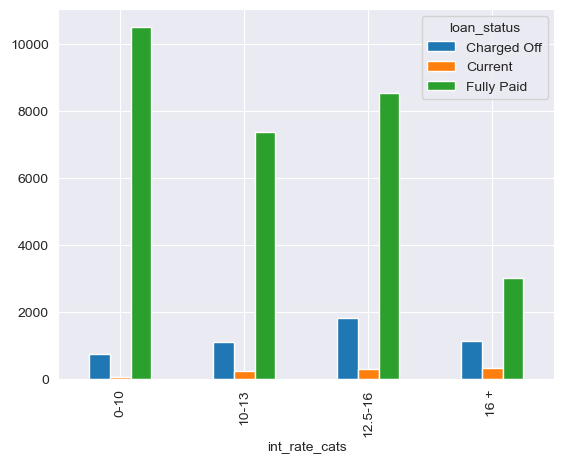

In [329]:
loan.groupby(['int_rate_cats']).loan_status.value_counts().unstack().plot.bar()

loan_status    Charged Off  Current  Fully Paid      total  percent_default
int_rate_cats                                                              
0-10               6187475   845100    93463325  100495900         6.156943
10-13             12459800  4342200    80763750   97565750        12.770670
12.5-16           21053750  4996975    94581850  120632575        17.452790
16 +              17459900  5402150    44853025   67715075        25.784362


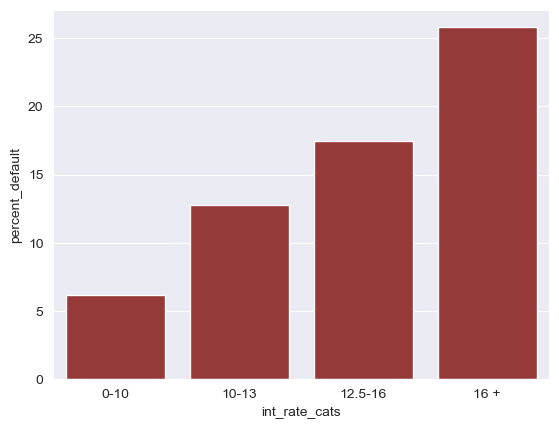

In [454]:
int_rate_cats_loan_anlys = loan.groupby(['int_rate_cats','loan_status']).loan_amnt.sum().unstack().fillna(0)
int_rate_cats_loan_anlys['total'] = int_rate_cats_loan_anlys['Charged Off']+int_rate_cats_loan_anlys['Current']+int_rate_cats_loan_anlys['Fully Paid']
int_rate_cats_loan_anlys['percent_default'] = (int_rate_cats_loan_anlys['Charged Off']*100)/int_rate_cats_loan_anlys['total']
print(int_rate_cats_loan_anlys)
sns.barplot(x = 'int_rate_cats', y = 'percent_default', data = int_rate_cats_loan_anlys, color = 'brown')
plt.show()

int_rate_cats
0-10       2.350797e+05
10-13      5.689972e+05
12.5-16    1.155722e+06
16 +       1.033249e+06
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'Interest Rate-Loan recovery trend')

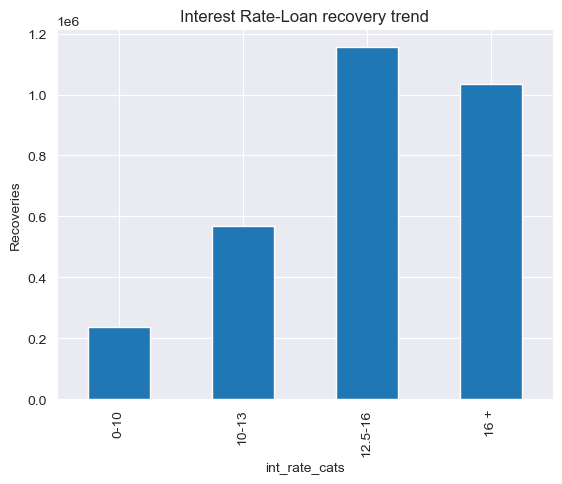

In [502]:
int_rate_cats_loan_analys = loan.groupby('int_rate_cats').recoveries.sum()
print(int_rate_cats_loan_analys)
loan.groupby('int_rate_cats')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('Interest Rate-Loan recovery trend')

## Subgrades and loan default analysis

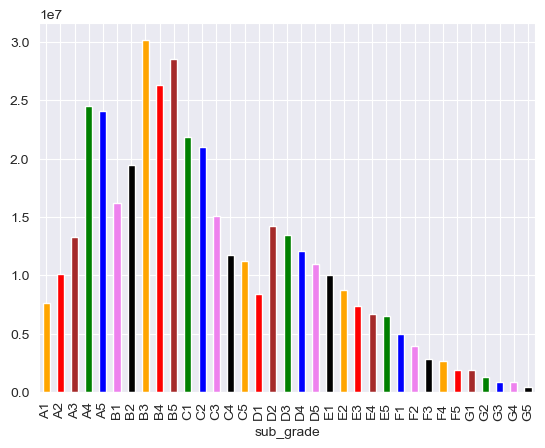

In [339]:
loan.groupby(['sub_grade']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.show()

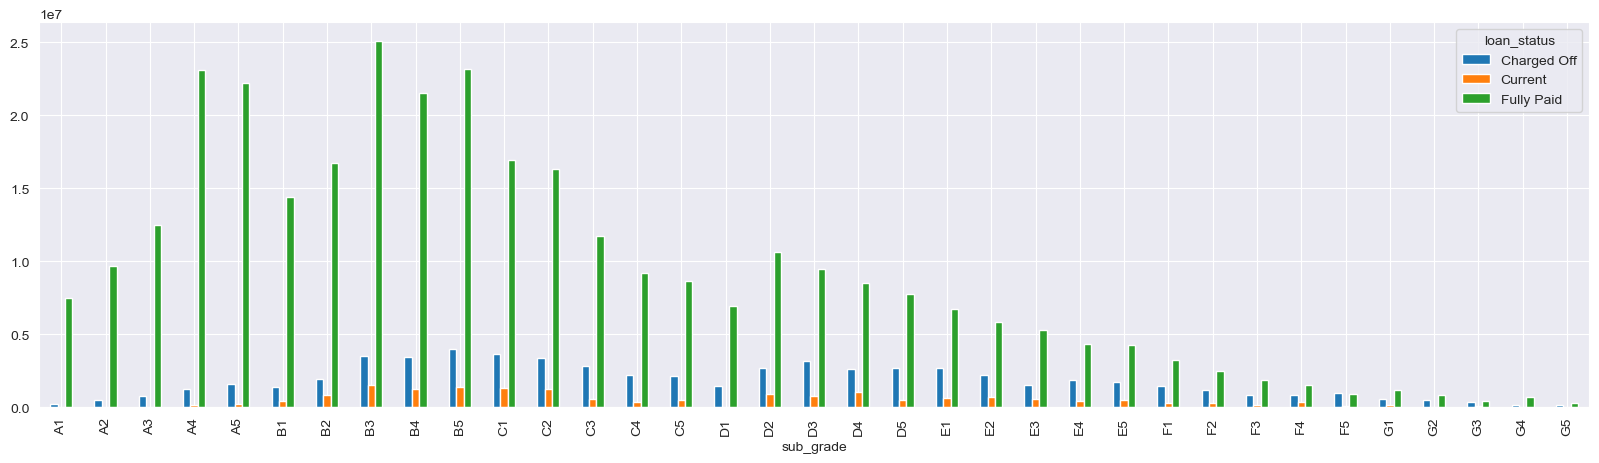

In [398]:
fig = loan.groupby(['sub_grade','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(20,5)
plt.show()

In [357]:
sub_grade_loan_anlys = loan.groupby(['sub_grade','loan_status']).loan_amnt.sum().unstack().fillna(0)
sub_grade_loan_anlys['total'] = sub_grade_loan_anlys['Charged Off']+sub_grade_loan_anlys['Current']+sub_grade_loan_anlys['Fully Paid']
sub_grade_loan_anlys['percent_default'] = (sub_grade_loan_anlys['Charged Off']*100)/sub_grade_loan_anlys['total']
sub_grade_loan_anlys

loan_status,Charged Off,Current,Fully Paid,total,percent_default
sub_grade,,,,,
A1,204200.0,0.0,7448750.0,7652950.0,2.668252
A2,479600.0,0.0,9648225.0,10127825.0,4.735469
A3,749700.0,0.0,12514900.0,13264600.0,5.651885
A4,1274800.0,137825.0,23119800.0,24532425.0,5.196388
A5,1612875.0,249150.0,22221475.0,24083500.0,6.697012
B1,1396000.0,418975.0,14386300.0,16201275.0,8.616606
B2,1952625.0,838000.0,16703250.0,19493875.0,10.016608
B3,3499475.0,1531525.0,25114300.0,30145300.0,11.608692
B4,3472000.0,1264575.0,21545400.0,26281975.0,13.210575


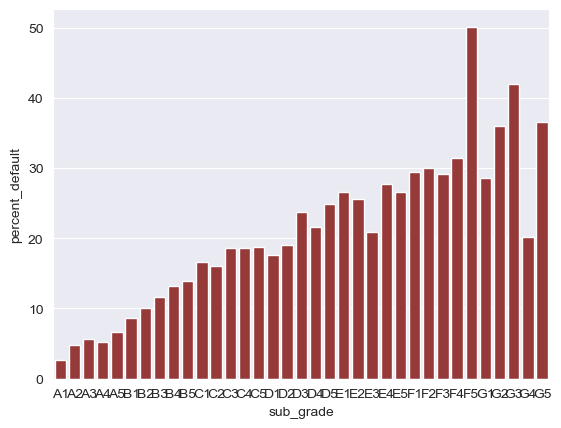

In [359]:
sns.barplot(x = 'sub_grade', y = 'percent_default', data = sub_grade_loan_anlys, color = 'brown')
plt.show()

sub_grade
A1     11599.030000
A2     12148.483437
A3     44799.000000
A4     44293.500000
A5     77335.481844
B1     41904.310000
B2     62583.553100
B3    174164.648485
B4    189904.560000
B5    158160.850000
C1    185968.273287
C2    175410.198126
C3    141231.420000
C4    126993.573110
C5    154224.950000
D1     85095.725605
D2    141706.280000
D3    155890.114061
D4    133187.411454
D5    153370.340000
E1    119244.240000
E2    138220.690000
E3     95014.760000
E4    144019.430000
E5    104021.210000
F1     90183.128838
F2    107288.490000
F3     63725.140000
F4     43427.830000
F5     96461.130000
G1     55456.950000
G2     23786.510000
G3     15975.980000
G4      8517.100000
G5     12978.740000
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'sub_grade-Loan recovery trend')

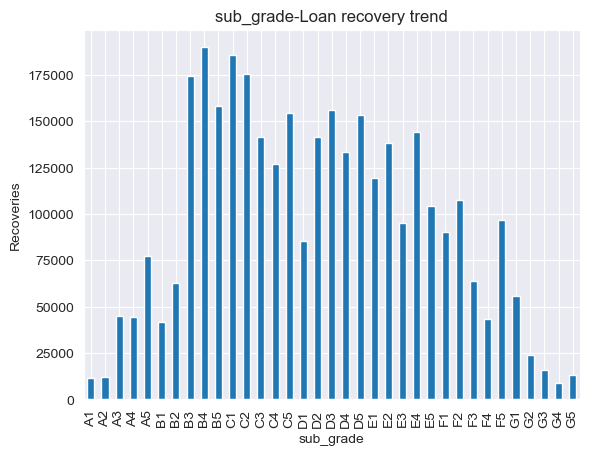

In [504]:
sub_grade_loan_analys = loan.groupby('sub_grade').recoveries.sum()
print(sub_grade_loan_analys)
loan.groupby('sub_grade')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('sub_grade-Loan recovery trend')

## Emp_length and loan status analysis

In [378]:
loan.emp_length.value_counts()

emp_length
10    8147
1     6884
4     3970
2     3915
3     3725
5     3032
6     2074
7     1669
8     1361
9     1163
Name: count, dtype: int64

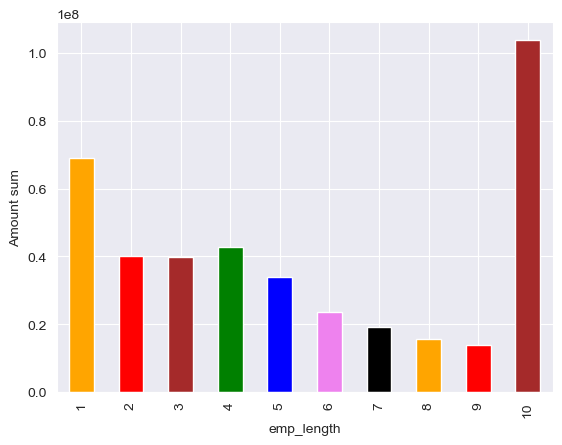

In [384]:
loan.groupby(['emp_length']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

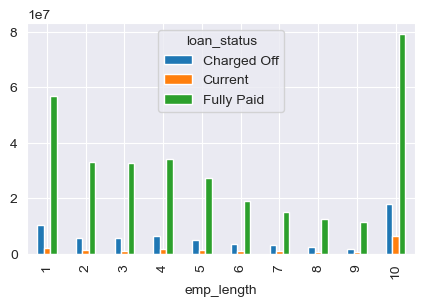

In [394]:
fig = loan.groupby(['emp_length','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(5,3)
plt.show()

loan_status  Charged Off  Current  Fully Paid      total  percent_default
emp_length                                                               
1               10269750  1922525    56812950   69005225        14.882569
2                5536175  1437725    33126225   40100125        13.805880
3                5819725  1165525    32739975   39725225        14.649948
4                6587875  1874750    34148850   42611475        15.460331
5                5155950  1383175    27370225   33909350        15.205098
6                3611575   862975    19068825   23543375        15.340090
7                3074475   918975    15233950   19227400        15.990071
8                2468150   627225    12598675   15694050        15.726661
9                1870275   478175    11402250   13750700        13.601308
10              18056125  6578150    79266450  103900725        17.378247


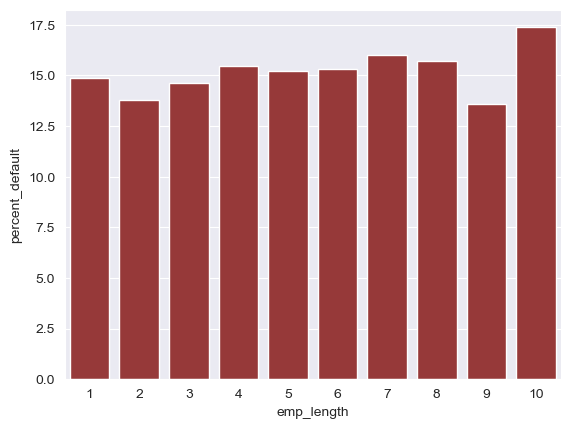

In [408]:
emp_length_loan_anlys = loan.groupby(['emp_length','loan_status']).loan_amnt.sum().unstack().fillna(0)
emp_length_loan_anlys['total'] = emp_length_loan_anlys['Charged Off']+emp_length_loan_anlys['Current']+emp_length_loan_anlys['Fully Paid']
emp_length_loan_anlys['percent_default'] = (emp_length_loan_anlys['Charged Off']*100)/emp_length_loan_anlys['total']
print(emp_length_loan_anlys)
sns.barplot(x = 'emp_length', y = 'percent_default', data = emp_length_loan_anlys, color = 'brown')
plt.show()

emp_length
1     6.137530e+05
2     2.956042e+05
3     2.763015e+05
4     3.179825e+05
5     2.689249e+05
6     2.183141e+05
7     1.401257e+05
8     1.310631e+05
9     8.510237e+04
10    1.041122e+06
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'emp_length-Loan recovery trend')

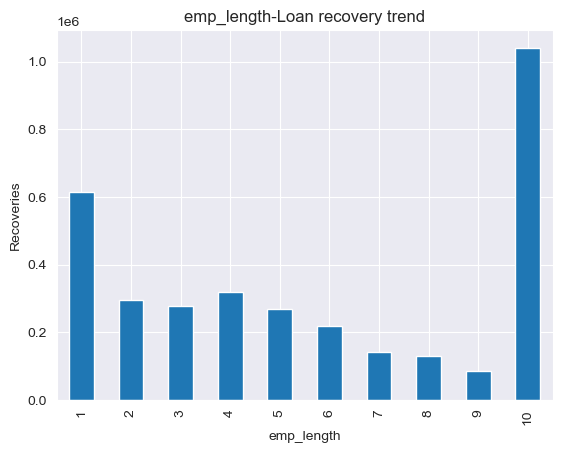

In [506]:
emp_length_loan_analys = loan.groupby('emp_length').recoveries.sum()
print(emp_length_loan_analys)
loan.groupby('emp_length')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('emp_length-Loan recovery trend')

## Home ownership and loan default

In [411]:
loan.home_ownership.value_counts()

home_ownership
RENT        17117
MORTGAGE    16102
OWN          2631
OTHER          88
NONE            2
Name: count, dtype: int64

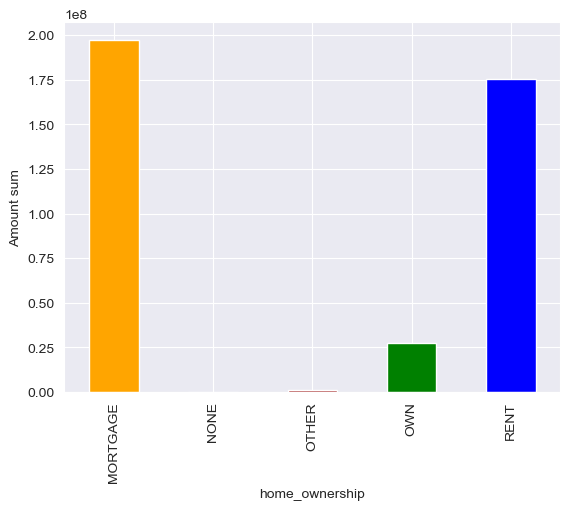

In [413]:
loan.groupby(['home_ownership']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

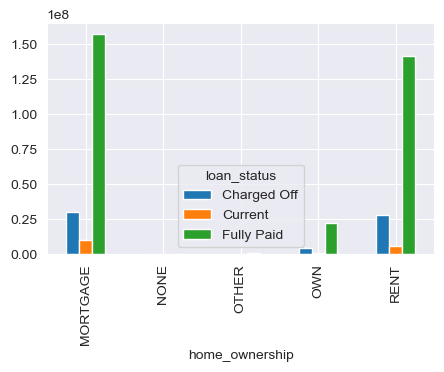

In [415]:
fig = loan.groupby(['home_ownership','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(5,3)
plt.show()

loan_status     Charged Off     Current   Fully Paid        total  \
home_ownership                                                      
MORTGAGE         29943450.0  10183525.0  157152875.0  197279850.0   
NONE                    0.0         0.0       6800.0       6800.0   
OTHER              227450.0         0.0     723375.0     950825.0   
OWN               4514875.0   1088075.0   22146100.0   27749050.0   
RENT             27764300.0   5977600.0  141739225.0  175481125.0   

loan_status     percent_default  
home_ownership                   
MORTGAGE              15.178159  
NONE                   0.000000  
OTHER                 23.921331  
OWN                   16.270377  
RENT                  15.821816  


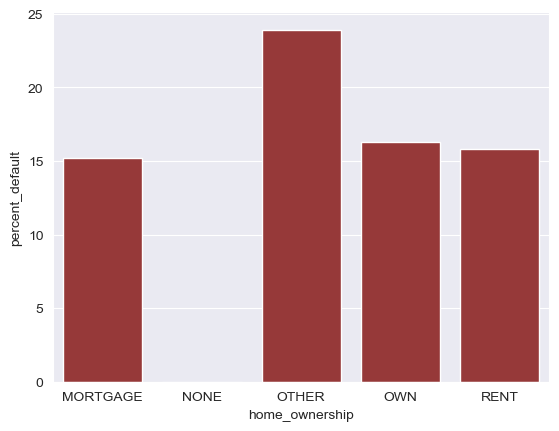

In [419]:
home_ownership_loan_anlys = loan.groupby(['home_ownership','loan_status']).loan_amnt.sum().unstack().fillna(0)
home_ownership_loan_anlys['total'] = home_ownership_loan_anlys['Charged Off']+home_ownership_loan_anlys['Current']+home_ownership_loan_anlys['Fully Paid']
home_ownership_loan_anlys['percent_default'] = (home_ownership_loan_anlys['Charged Off']*100)/home_ownership_loan_anlys['total']
print(home_ownership_loan_anlys)
sns.barplot(x = 'home_ownership', y = 'percent_default', data = home_ownership_loan_anlys, color = 'brown')
plt.show()

home_ownership
MORTGAGE    1.699543e+06
NONE        0.000000e+00
OTHER       7.484138e+03
OWN         2.811738e+05
RENT        1.400092e+06
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'home_ownership-Loan recovery trend')

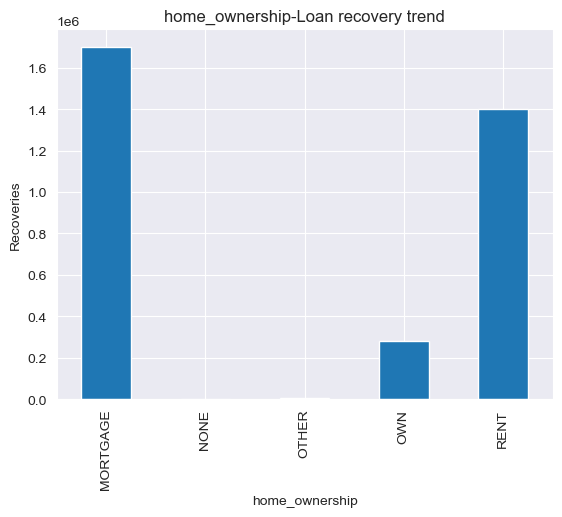

In [508]:
home_ownership_loan_analys = loan.groupby('home_ownership').recoveries.sum()
print(home_ownership_loan_analys)
loan.groupby('home_ownership')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('home_ownership-Loan recovery trend')

## Annual income and loan default possibility

In [422]:
loan.annual_inc_cat.value_counts()

annual_inc_cat
40K-60K     10979
80K-140K     8845
60K-80K      8704
24K-40K      7198
140K          214
Name: count, dtype: int64

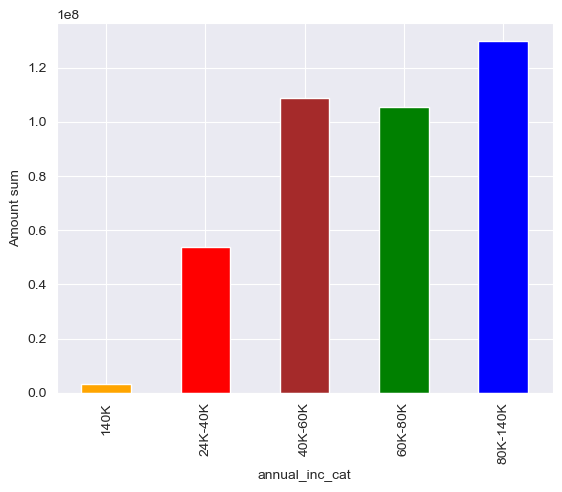

In [424]:
loan.groupby(['annual_inc_cat']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

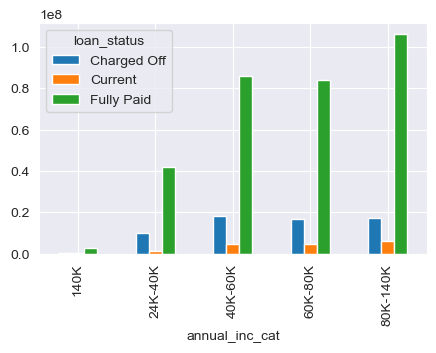

In [426]:
fig = loan.groupby(['annual_inc_cat','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(5,3)
plt.show()

loan_status     Charged Off  Current  Fully Paid      total  percent_default
annual_inc_cat                                                              
140K                 303925   176000     2898225    3378150         8.996788
24K-40K            10168575  1464075    42154825   53787475        18.905098
40K-60K            18164450  4765150    85894100  108823700        16.691631
60K-80K            16675975  4582800    84307300  105566075        15.796718
80K-140K           17137150  6261175   106513925  129912250        13.191327


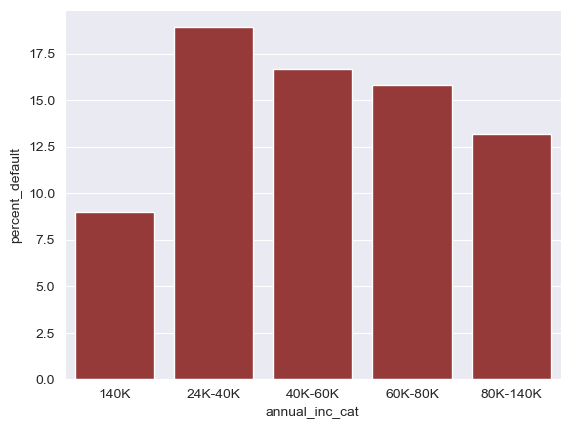

In [428]:
annual_inc_cat_loan_anlys = loan.groupby(['annual_inc_cat','loan_status']).loan_amnt.sum().unstack().fillna(0)
annual_inc_cat_loan_anlys['total'] = annual_inc_cat_loan_anlys['Charged Off']+annual_inc_cat_loan_anlys['Current']+annual_inc_cat_loan_anlys['Fully Paid']
annual_inc_cat_loan_anlys['percent_default'] = (annual_inc_cat_loan_anlys['Charged Off']*100)/annual_inc_cat_loan_anlys['total']
print(annual_inc_cat_loan_anlys)
sns.barplot(x = 'annual_inc_cat', y = 'percent_default', data = annual_inc_cat_loan_anlys, color = 'brown')
plt.show()

annual_inc_cat
140K        4.664828e+04
24K-40K     4.825719e+05
40K-60K     8.415750e+05
60K-80K     9.034754e+05
80K-140K    1.114022e+06
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'annual_inc_cat-Loan recovery trend')

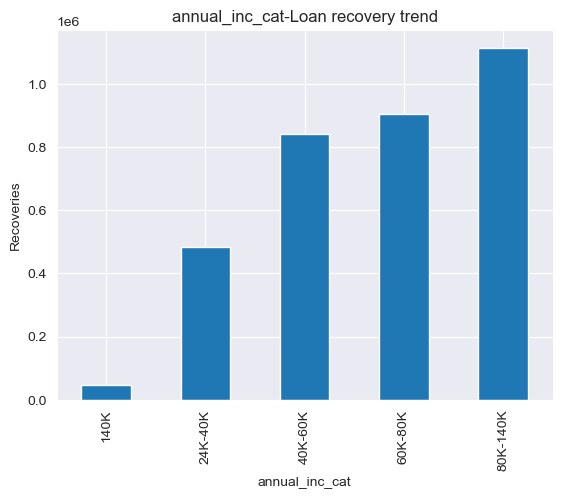

In [510]:
annual_inc_cat_loan_analys = loan.groupby('annual_inc_cat').recoveries.sum()
print(annual_inc_cat_loan_analys)
loan.groupby('annual_inc_cat')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('annual_inc_cat-Loan recovery trend')

## Verification status and loan default possibility

In [431]:
loan.verification_status.value_counts()

verification_status
Not Verified       15583
Verified           11411
Source Verified     8946
Name: count, dtype: int64

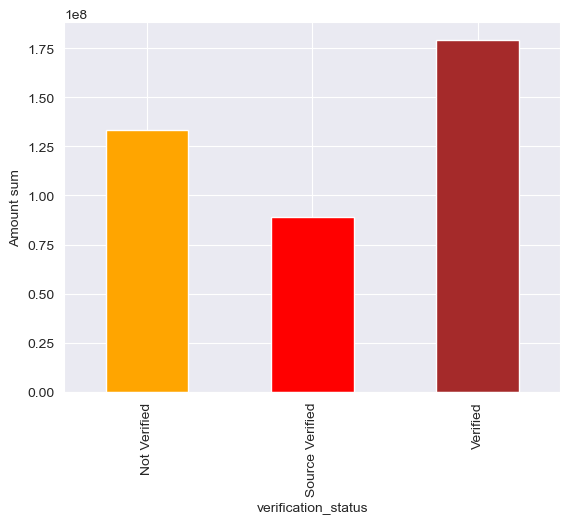

In [433]:
loan.groupby(['verification_status']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

loan_status          Charged Off   Current  Fully Paid      total  \
verification_status                                                 
Not Verified            17151850   2425600   113598950  133176400   
Source Verified         13774650   3720300    71546325   89041275   
Verified                31523575  11103300   136623100  179249975   

loan_status          percent_default  
verification_status                   
Not Verified               12.879046  
Source Verified            15.469960  
Verified                   17.586376  


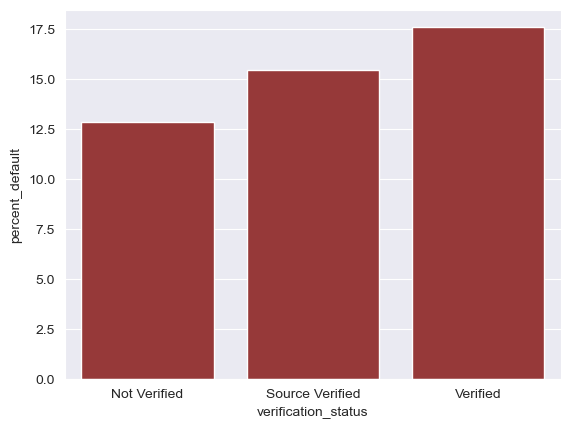

In [435]:
verification_status_loan_anlys = loan.groupby(['verification_status','loan_status']).loan_amnt.sum().unstack().fillna(0)
verification_status_loan_anlys['total'] = verification_status_loan_anlys['Charged Off']+verification_status_loan_anlys['Current']+verification_status_loan_anlys['Fully Paid']
verification_status_loan_anlys['percent_default'] = (verification_status_loan_anlys['Charged Off']*100)/verification_status_loan_anlys['total']
print(verification_status_loan_anlys)
sns.barplot(x = 'verification_status', y = 'percent_default', data = verification_status_loan_anlys, color = 'brown')
plt.show()

verification_status
Not Verified       8.687191e+05
Source Verified    6.364395e+05
Verified           1.883134e+06
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'verification_status-Loan recovery trend')

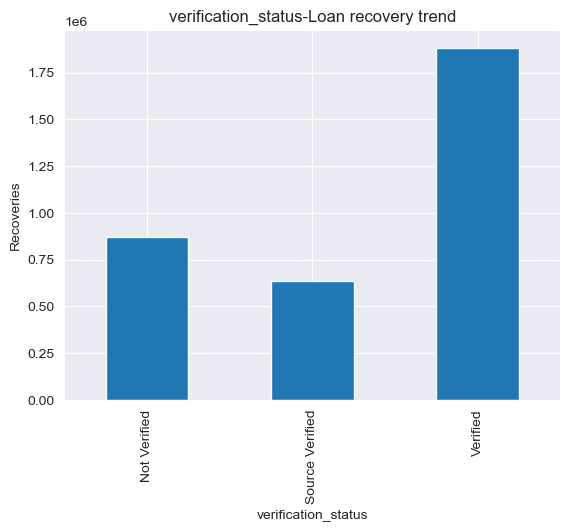

In [514]:
verification_status_loan_analys = loan.groupby('verification_status').recoveries.sum()
print(verification_status_loan_analys)
loan.groupby('verification_status')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('verification_status-Loan recovery trend')

## purpose and loan defaulting possibility

In [441]:
loan.purpose.value_counts()

purpose
debt_consolidation    17181
credit_card            4728
other                  3485
home_improvement       2583
major_purchase         1929
small_business         1631
car                    1397
wedding                 886
medical                 617
moving                  491
vacation                342
house                   338
educational             249
renewable_energy         83
Name: count, dtype: int64

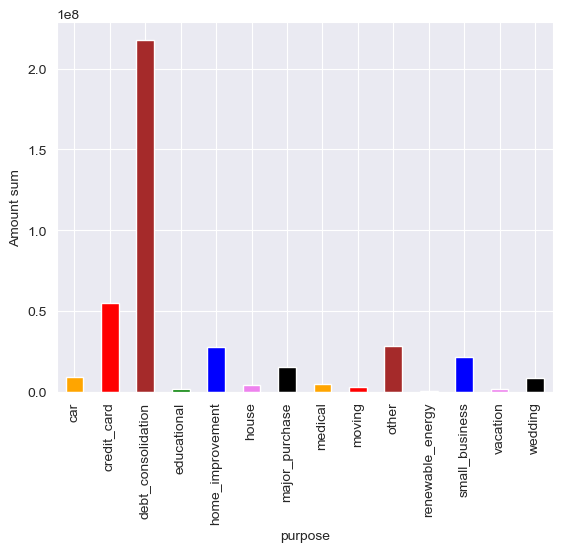

In [444]:
loan.groupby(['purpose']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

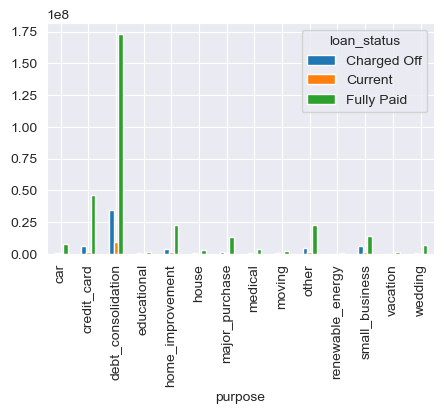

In [446]:
fig = loan.groupby(['purpose','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(5,3)
plt.show()

loan_status         Charged Off    Current   Fully Paid        total  \
purpose                                                                
car                   1093600.0   375025.0    8085900.0    9554525.0   
credit_card           6490900.0  1833250.0   46624025.0   54948175.0   
debt_consolidation   34844325.0  9812125.0  173080800.0  217737250.0   
educational            378850.0        0.0    1437950.0    1816800.0   
home_improvement      3601525.0  1409025.0   22953475.0   27964025.0   
house                  633175.0   260550.0    3312025.0    4205750.0   
major_purchase        1791950.0   419900.0   13427150.0   15639000.0   
medical                859200.0   134125.0    3997200.0    4990525.0   
moving                 473150.0    93875.0    2637550.0    3204575.0   
other                 4466250.0  1253400.0   22509750.0   28229400.0   
renewable_energy       125600.0    27000.0     608475.0     761075.0   
small_business        6437100.0  1290425.0   14120850.0   218483

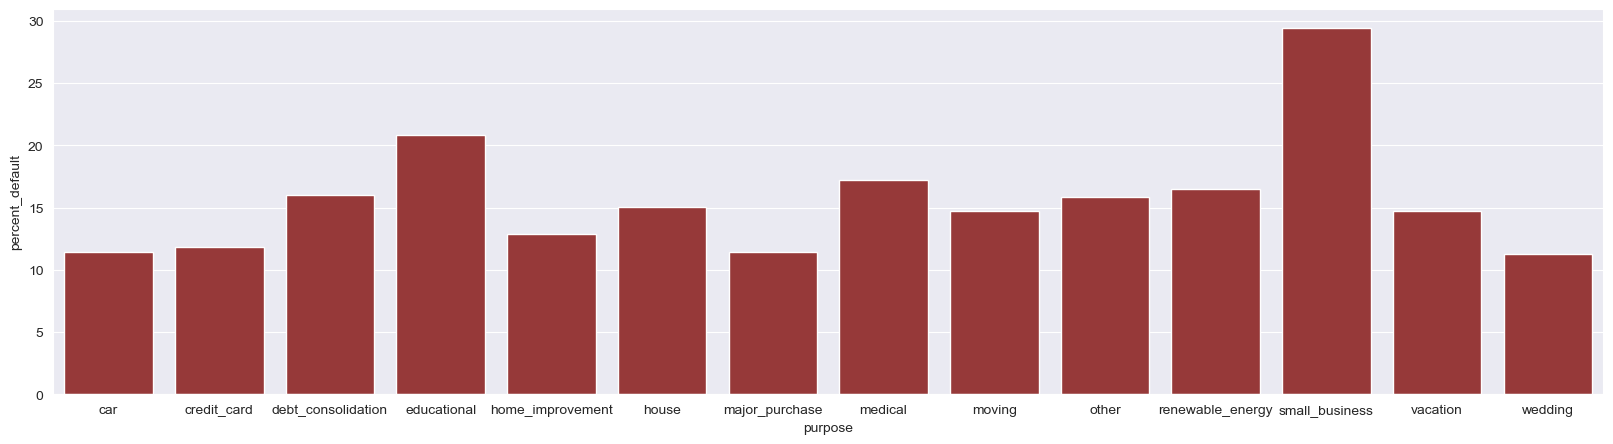

In [452]:
purpose_loan_anlys = loan.groupby(['purpose','loan_status']).loan_amnt.sum().unstack().fillna(0)
purpose_loan_anlys['total'] = purpose_loan_anlys['Charged Off']+purpose_loan_anlys['Current']+purpose_loan_anlys['Fully Paid']
purpose_loan_anlys['percent_default'] = (purpose_loan_anlys['Charged Off']*100)/purpose_loan_anlys['total']
print(purpose_loan_anlys)
fig = sns.barplot(x = 'purpose', y = 'percent_default', data = purpose_loan_anlys, color = 'brown')
fig.get_figure().set_size_inches(20,5)
plt.show()

purpose
car                   6.218317e+04
credit_card           3.372033e+05
debt_consolidation    1.978877e+06
educational           1.635081e+04
home_improvement      1.459850e+05
house                 3.348301e+04
major_purchase        9.041740e+04
medical               4.025135e+04
moving                1.277382e+04
other                 2.136115e+05
renewable_energy      1.575538e+04
small_business        3.446480e+05
vacation              8.235370e+03
wedding               8.851802e+04
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'purpose-Loan recovery trend')

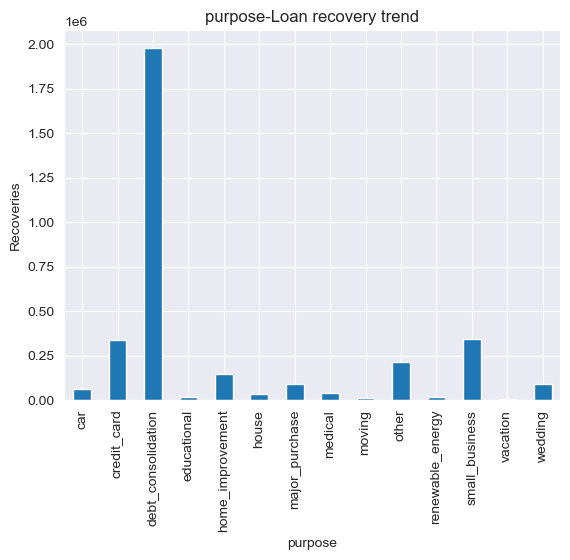

In [516]:
purpose_loan_analys = loan.groupby('purpose').recoveries.sum()
print(purpose_loan_analys)
loan.groupby('purpose')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('purpose-Loan recovery trend')

## Address state and loan defaulting possibilities

In [464]:
loan.addr_state.value_counts()

addr_state
CA    6388
NY    3444
FL    2574
TX    2429
NJ    1666
IL    1385
PA    1381
VA    1296
GA    1268
MA    1196
OH    1113
MD     970
AZ     788
WA     758
CO     730
NC     722
CT     675
MI     647
MO     636
MN     554
NV     460
SC     434
AL     418
WI     415
OR     408
LA     384
KY     298
OK     275
KS     244
UT     236
AR     230
DC     195
RI     186
NM     171
HI     157
WV     155
NH     153
DE     109
WY      77
MT      76
AK      73
SD      60
VT      50
MS      17
TN      15
IN       8
IA       5
NE       5
ID       5
ME       1
Name: count, dtype: int64

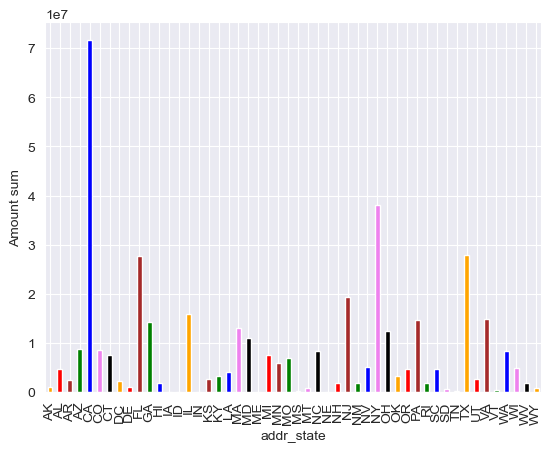

In [467]:
loan.groupby(['addr_state']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

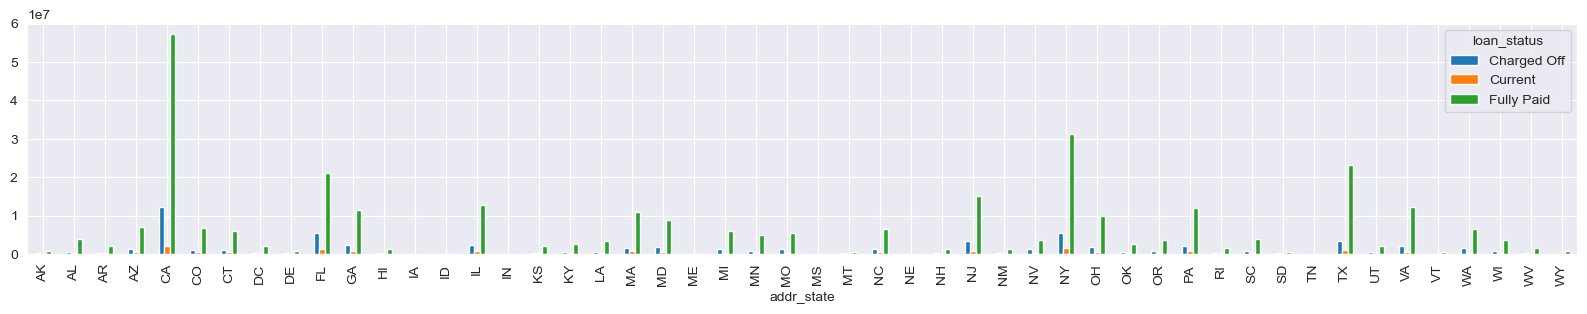

In [469]:
fig = loan.groupby(['addr_state','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(20,3)
plt.show()

loan_status  Charged Off    Current  Fully Paid       total  percent_default
addr_state                                                                  
AK              187875.0    58000.0    680425.0    926300.0        20.282306
AL              633525.0   319975.0   3814825.0   4768325.0        13.286112
AR              243350.0   170025.0   2038475.0   2451850.0         9.925159
AZ             1304750.0   448950.0   6917825.0   8671525.0        15.046373
CA            12293500.0  2060650.0  57318725.0  71672875.0        17.152235
CO             1128850.0   436900.0   6878725.0   8444475.0        13.367912
CT              992500.0   428650.0   6048125.0   7469275.0        13.287769
DC              168000.0    62000.0   2105900.0   2335900.0         7.192089
DE              134750.0    35000.0    900350.0   1070100.0        12.592281
FL             5348525.0  1293550.0  21074825.0  27716900.0        19.296981
GA             2276225.0   674550.0  11333425.0  14284200.0        15.935264

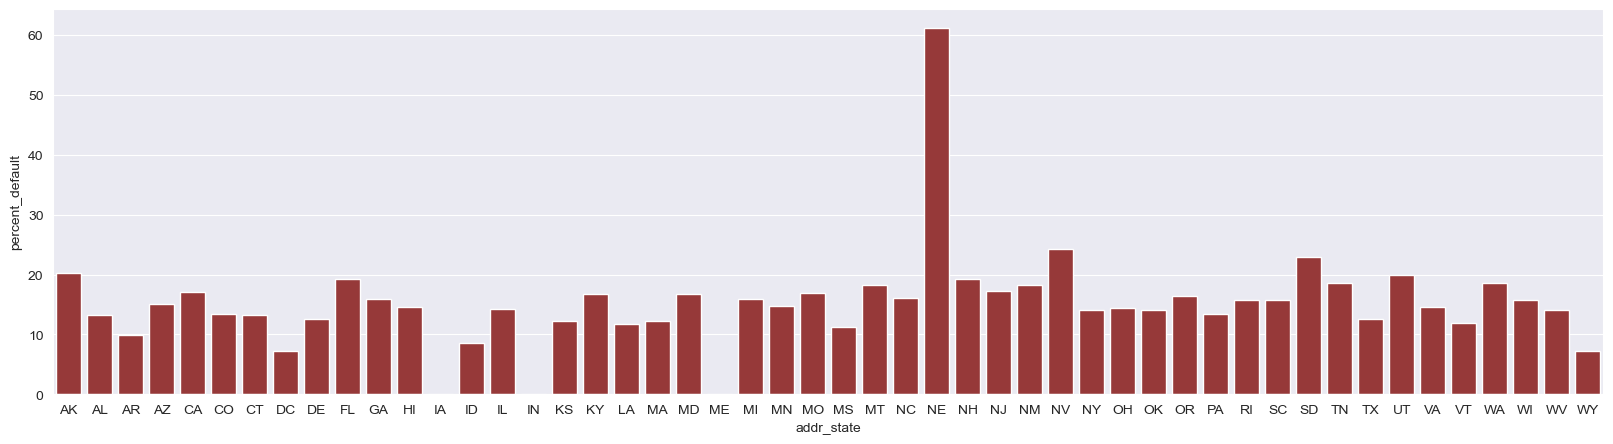

In [471]:
addr_state_loan_anlys = loan.groupby(['addr_state','loan_status']).loan_amnt.sum().unstack().fillna(0)
addr_state_loan_anlys['total'] = addr_state_loan_anlys['Charged Off']+addr_state_loan_anlys['Current']+addr_state_loan_anlys['Fully Paid']
addr_state_loan_anlys['percent_default'] = (addr_state_loan_anlys['Charged Off']*100)/addr_state_loan_anlys['total']
print(addr_state_loan_anlys)
fig = sns.barplot(x = 'addr_state', y = 'percent_default', data = addr_state_loan_anlys, color = 'brown')
fig.get_figure().set_size_inches(20,5)
plt.show()

addr_state
AK     10866.990000
AL     66575.950000
AR      9990.810000
AZ     87808.990000
CA    570771.290000
CO     79939.738485
CT     29727.560000
DC      5634.540000
DE     13592.070000
FL    250498.849620
GA    129847.795605
HI     17358.250000
IA         0.000000
ID         0.000000
IL    108812.300000
IN         0.000000
KS     11567.950000
KY     15514.960000
LA     19160.170000
MA     83521.240000
MD    126209.910000
ME         0.000000
MI     91441.410000
MN     69569.143100
MO    117779.171454
MS         0.000000
MT      5251.280000
NC     59723.498838
NE       710.250000
NH     26586.960000
NJ    168512.914061
NM     12247.930000
NV     48981.800000
NY    295859.528126
OH    162647.490000
OK     23348.880000
OR     30472.710000
PA    109422.130000
RI     13483.480000
SC     36374.100000
SD     10361.330000
TN      1603.510000
TX    187959.860000
UT     24880.900000
VA    130863.182058
VT       891.840000
WA     82463.610000
WI     30644.770000
WV      6596.220000
WY      2

Text(0.5, 1.0, 'addr_state-Loan recovery trend')

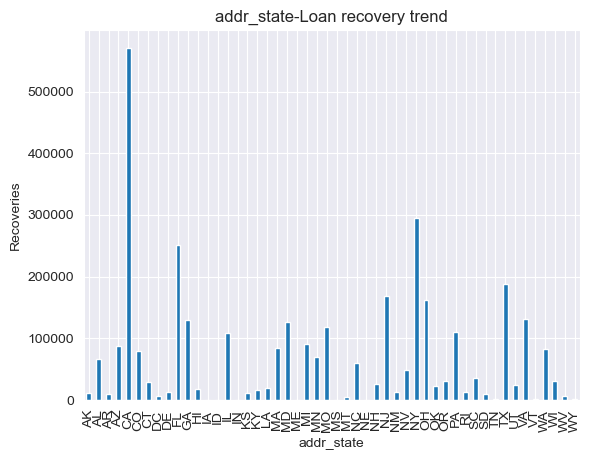

In [518]:
addr_state_loan_analys = loan.groupby('addr_state').recoveries.sum()
print(addr_state_loan_analys)
loan.groupby('addr_state')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('addr_state-Loan recovery trend')

## dti and loan detault possibility

In [475]:
loan.dti_cats.value_counts()

dti_cats
10-15    9009
15-20    8470
05-10    7047
25+      6411
0-5      4228
Name: count, dtype: int64

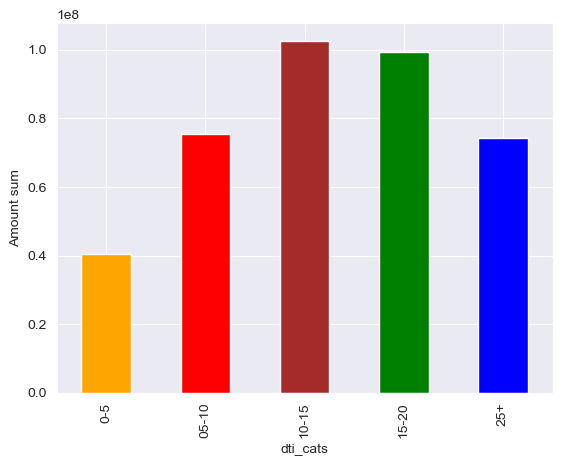

In [527]:
loan.groupby(['dti_cats']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

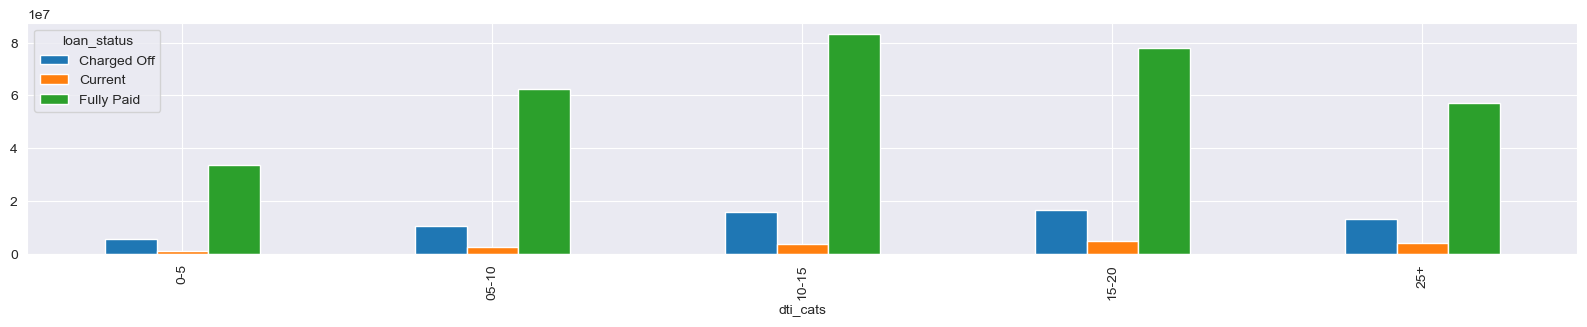

In [529]:
fig = loan.groupby(['dti_cats','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(20,3)
plt.show()

loan_status  Charged Off  Current  Fully Paid      total  percent_default
dti_cats                                                                 
0-5              5428075  1189900    33722200   40340175        13.455755
05-10           10549200  2564700    62408250   75522150        13.968352
10-15           15630925  3667775    83347500  102646200        15.227963
15-20           16449775  4970100    78040625   99460500        16.539003
25+             13070775  3914200    57178200   74163175        17.624347


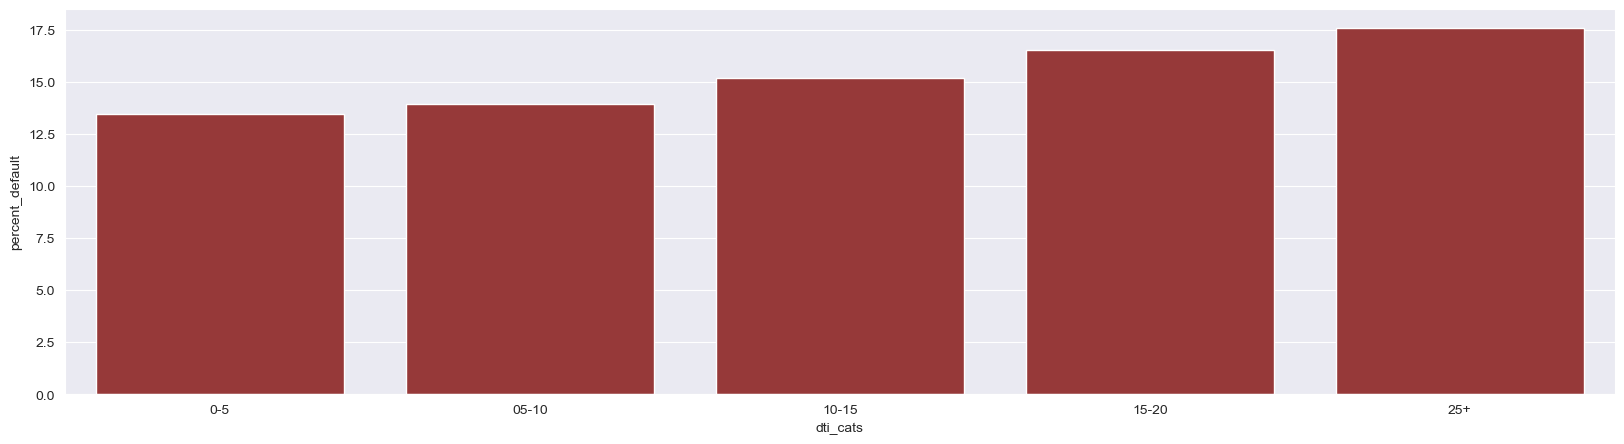

In [531]:
dti_cats_loan_anlys = loan.groupby(['dti_cats','loan_status']).loan_amnt.sum().unstack().fillna(0)
dti_cats_loan_anlys['total'] = dti_cats_loan_anlys['Charged Off']+dti_cats_loan_anlys['Current']+dti_cats_loan_anlys['Fully Paid']
dti_cats_loan_anlys['percent_default'] = (dti_cats_loan_anlys['Charged Off']*100)/dti_cats_loan_anlys['total']
print(dti_cats_loan_anlys)
fig = sns.barplot(x = 'dti_cats', y = 'percent_default', data = dti_cats_loan_anlys, color = 'brown')
fig.get_figure().set_size_inches(20,5)
plt.show()

dti_cats
0-5      265959.041226
05-10    525486.430496
10-15    854021.819015
15-20    935061.167323
25+      764090.273287
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'dti_cats-Loan recovery trend')

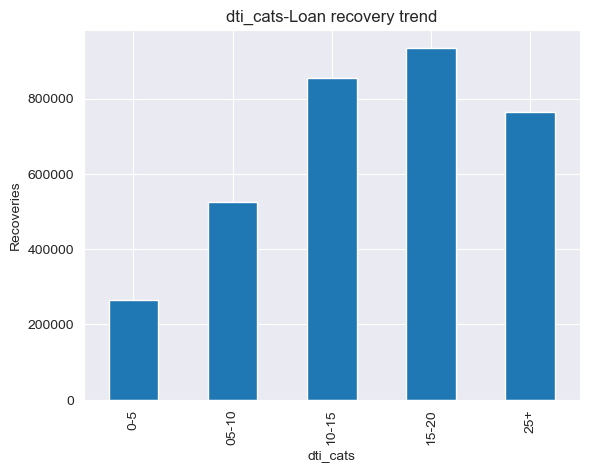

In [542]:
dti_cats_loan_analys = loan.groupby('dti_cats').recoveries.sum()
print(dti_cats_loan_analys)
loan.groupby('dti_cats')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('dti_cats-Loan recovery trend')

## Derogatory pub record and loan default analysis

In [534]:
loan.pub_rec.value_counts()

pub_rec
0    33966
1     1923
2       43
3        6
4        2
Name: count, dtype: int64

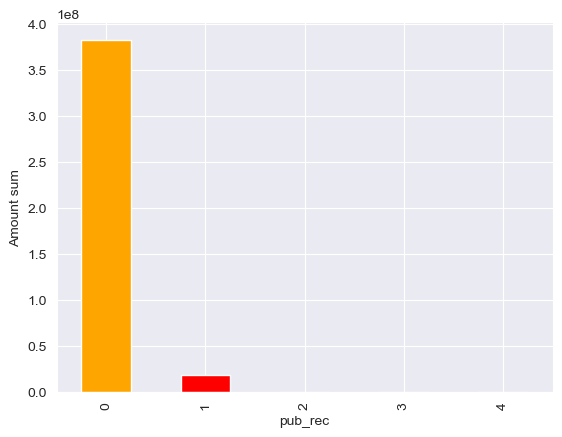

In [536]:
loan.groupby(['pub_rec']).loan_amnt.sum().plot.bar(color = ['orange','Red','brown','green','blue','violet','black'])
plt.ylabel('Amount sum')
plt.show()

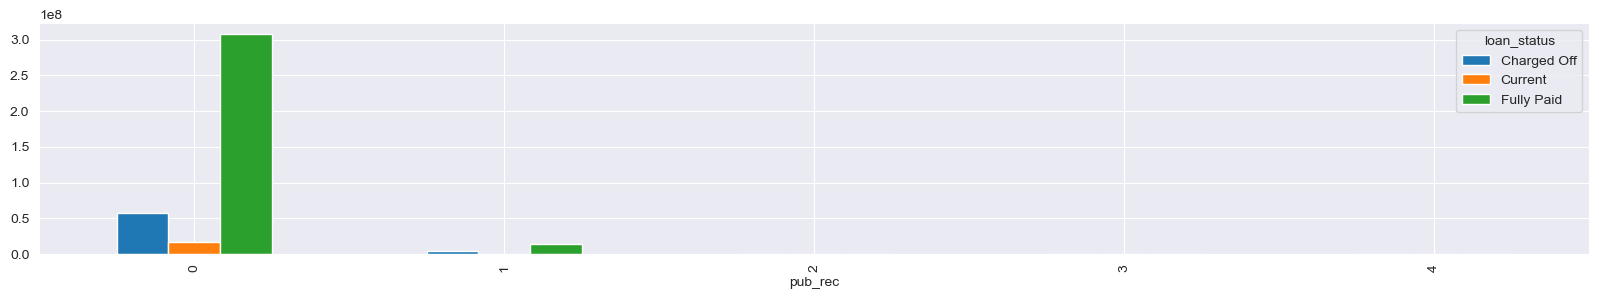

In [538]:
fig = loan.groupby(['pub_rec','loan_status']).loan_amnt.sum().unstack().plot.bar()
fig.get_figure().set_size_inches(20,3)
plt.show()

loan_status  Charged Off     Current   Fully Paid        total  \
pub_rec                                                          
0             57595600.0  16707000.0  307929950.0  382232550.0   
1              4764225.0    507200.0   13543350.0   18814775.0   
2                90250.0     35000.0     246575.0     371825.0   
3                    0.0         0.0      31300.0      31300.0   
4                    0.0         0.0      17200.0      17200.0   

loan_status  percent_default  
pub_rec                       
0                  15.068209  
1                  25.321722  
2                  24.272171  
3                   0.000000  
4                   0.000000  


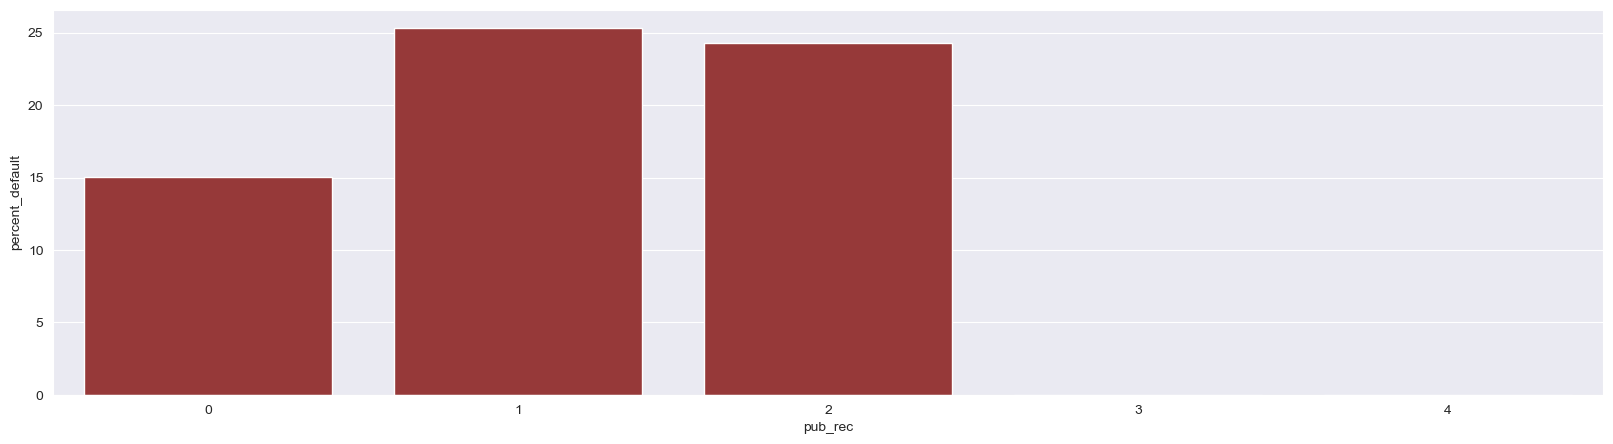

In [540]:
pub_rec_loan_anlys = loan.groupby(['pub_rec','loan_status']).loan_amnt.sum().unstack().fillna(0)
pub_rec_loan_anlys['total'] = pub_rec_loan_anlys['Charged Off']+pub_rec_loan_anlys['Current']+pub_rec_loan_anlys['Fully Paid']
pub_rec_loan_anlys['percent_default'] = (pub_rec_loan_anlys['Charged Off']*100)/pub_rec_loan_anlys['total']
print(pub_rec_loan_anlys)
fig = sns.barplot(x = 'pub_rec', y = 'percent_default', data = pub_rec_loan_anlys, color = 'brown')
fig.get_figure().set_size_inches(20,5)
plt.show()

pub_rec
0    3.233320e+06
1    1.494600e+05
2    5.512680e+03
3    0.000000e+00
4    0.000000e+00
Name: recoveries, dtype: float64


Text(0.5, 1.0, 'pub_rec-Loan recovery trend')

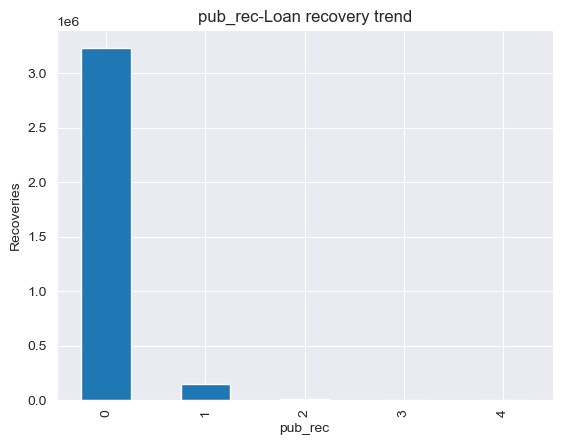

In [544]:
pub_rec_loan_analys = loan.groupby('pub_rec').recoveries.sum()
print(pub_rec_loan_analys)
loan.groupby('pub_rec')['recoveries'].sum().plot.bar()
plt.ylabel('Recoveries')
plt.title('pub_rec-Loan recovery trend')

In [554]:
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    34370
1.0     1564
2.0        6
Name: count, dtype: int64

## Multivariate analysis for the links between categorical variable causing the default

In [602]:
# Columns impacting the charged off amounts and recovery amounts:
# 'year', 'grade', 'sub_grade', 'int_rate_cats', 'emp_length', 'annual_inc_cat', 'verification_status', 'purpose', 'addr_state', 'dti_cats', 'pub_rec'
loan_default = loan[loan['loan_status'] == 'Charged Off']
loan_default.shape

(5067, 43)

## Grade and other columns
# **observations:**
* Interest rate 
1) Grade A is taking loan with interest rates 0 to 10 only
2) Maximum defaults are in B, C and D
3) In B the one taking interest rate 10-12.5 have more defaulters
4) In C the one taking interest rate 12.5-16 have more defaulters
5) For 16+ interest rates grade D and E have more defaulters

* Annual income
1) Grade B,C and D have more defaulters for annual income 20K-60K
2) Grade E have more defaulters with annual income 40K to 60K

* Loan amounts:
1) Grade B,C and D have more defaulters with loan amount 0-21K
2) Grade E have more defaulters with 7K-21K

* Purpose:
1) Grade B,C,D and E have maximum defaulter with the purpose of debt_consolidation

* State:
1) Grade A have max defaulters in states: CA, NJ
2) NY, FL, NJ and CA have maximum defaulters for A to E categories

* dti_cats
1) for grade B,C,D,E maximum defaulters are in 10-20 dti
2) For grade A maximum defaulters are in 5-15 dti

* Sub_grades
1) A4 and A5 have more defaulters
2) B3,B4 and B5 have more defaulters
3) C1, C2, C3 have more defaulters
4) F1, E1,E2 have more defaulters
5) D2 has more tendency to default

* pub_rec
1) Grade F and G have in general high average in the defaulter, but having 0 or 1 public record among them is having high average amount defaulters.

* home ownership
1) Mortgaged home ownership is more prone to be defaulted

In [604]:
pd.pivot_table(loan_default,index = 'grade',
         columns = 'int_rate_cats', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                      mean  \
              loan_amnt                                 loan_amnt   
int_rate_cats      0-10   10-12.5   12.5-16     16 +         0-10   
grade                                                               
A               4321175         0         0        0  8061.893657   
B               1866300  11280925   1136800        0  9285.074627   
C                     0   1064500  13012550    32800          NaN   
D                     0    114375   6385775  6211625          NaN   
E                     0         0    516500  8861025          NaN   
F                     0         0      2125  2253700          NaN   
G                     0         0         0   100750          NaN   

                                                            count          \
                                                        loan_amnt           
int_rate_cats       10-12.5       12.5-16          16 +      0-10 10-12.5   
grade                                                                       
A                       NaN           NaN           NaN       536       0   
B              11326.229920  13066.666667           NaN       201     996   
C               9948.598131  11566.711111  16400.000000         0     107   
D               9531.250000  11302.256637  14479.312354         0      12   
E                       NaN  12912.500000  15683.230088         0       0   
F                       NaN   2125.000000  17203.816794         0       0   
G                       NaN           NaN  14392.857143         0       0   

                            
                            
int_rate_cats 12.5-16 16 +  
grade                       
A                   0    0  
B                  87    0  
C                1125    2  
D                 565  429  
E                  40  565  
F                   1  131  
G                   0    7

In [585]:
pd.pivot_table(loan_default,index = 'grade',
         columns = 'annual_inc_cats', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                               \
                loan_amnt                                                
annual_inc_cats   0-20000 20000-40000 40000-60000 60000-80000  80000 +   
grade                                                                    
A                       0     1201275     1593150      831225   695525   
B                       0     3329800     4760200     3066425  3127600   
C                       0     3146125     4700725     3053925  3209075   
D                       0     2200300     3976025     3119275  3416175   
E                       0     1235400     3156650     2605625  3026575   
F                       0      404700     1429325     1631700  1822025   
G                       0      200725      325175      448950   736400   

                         mean                                            \
                    loan_amnt                                             
annual_inc_cats   20000-40000   40000-60000   60000-80000       80000 +   
grade                                                                     
A                 6636.878453   8005.778894   9339.606742  10380.970149   
B                 8242.079208  11121.962617  12265.700000  15483.168317   
C                 8572.547684  10931.918605  13453.414097  15281.309524   
D                 8495.366795  11591.909621  14996.514423  17429.464286   
E                 9430.534351  14348.409091  17725.340136  22091.788321   
F                10937.837838  16242.329545  20144.444444  24621.959459   
G                11151.388889  15484.523810  20406.818182  23754.838710   

                    count                                              
                loan_amnt                                              
annual_inc_cats   0-20000 20000-40000 40000-60000 60000-80000 80000 +  
grade                                                                  
A                       0         181         199          89      67  
B                       0         404         428         250     202  
C                       0         367         430         227     210  
D                       0         259         343         208     196  
E                       0         131         220         147     137  
F                       0          37          88          81      74  
G                       0          18          21          22      31

In [587]:
pd.pivot_table(loan_default,index = 'grade',
         columns = 'loan_amnt_cats', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                              \
               loan_amnt                                               
loan_amnt_cats    0-7000 7000-14000 14000-21000 21000-28000  28000 +   
grade                                                                  
A                1182100    2092000      746525      240550    60000   
B                1971200    4598950     4588325     2137100   988450   
C                1860875    4235725     4475625     2370400  1167225   
D                1205575    3666750     4294650     2286650  1258150   
E                 541050    1975475     3020475     2408975  2078275   
F                 146925     563950     1497025     1758650  1321200   
G                  54500     215300      499450      504600   437400   

                       mean                                            \
                  loan_amnt                                             
loan_amnt_cats       0-7000    7000-14000   14000-21000   21000-28000   
grade                                                                   
A               4361.992620  10106.280193  16228.804348  24055.000000   
B               4390.200445  10242.650334  17120.615672  24285.227273   
C               4368.251174  10231.219807  17147.988506  24187.755102   
D               4532.236842  10213.788301  17178.600000  24587.634409   
E               4585.169492  10736.277174  17560.901163  24581.377551   
F               4897.500000  10640.566038  17612.058824  24425.694444   
G               4954.545455  11331.578947  17837.500000  24028.571429   

                                 count                                     \
                             loan_amnt                                      
loan_amnt_cats       28000 +    0-7000 7000-14000 14000-21000 21000-28000   
grade                                                                       
A               30000.000000       271        207          46          10   
B               32948.333333       449        449         268          88   
C               33349.285714       426        414         261          98   
D               33109.210526       266        359         250          93   
E               32988.492063       118        184         172          98   
F               33030.000000        30         53          85          72   
G               33646.153846        11         19          28          21   

                        
                        
loan_amnt_cats 28000 +  
grade                   
A                    2  
B                   30  
C                   35  
D                   38  
E                   63  
F                   40  
G                   13

In [614]:
pd.pivot_table(loan_default,index = 'purpose',
         columns = 'grade', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                              \
                    loan_amnt                                               
grade                       A          B          C          D          E   
purpose                                                                     
car                  220925.0   397100.0   198100.0   154875.0    83800.0   
credit_card          544475.0  1560475.0  1756475.0  1237625.0   913950.0   
debt_consolidation  1856925.0  7211650.0  7588325.0  7274225.0  6282300.0   
educational           23500.0   168625.0   103125.0    52600.0     7000.0   
home_improvement     324575.0   917775.0   947200.0   704900.0   453325.0   
house                 13750.0   154925.0   155800.0   120600.0   103700.0   
major_purchase       238450.0   467200.0   450925.0   382450.0   186925.0   
medical               79625.0   195075.0   250750.0   172400.0    73550.0   
moving                70100.0   156500.0    83625.0    55000.0    87000.0   
other                419875.0  1095500.0  1083050.0   921325.0   571925.0   
renewable_energy      35700.0    26900.0    26000.0        NaN        NaN   
small_business       365475.0  1566075.0  1225475.0  1436075.0  1028650.0   
vacation              64600.0   106050.0    15100.0    10600.0    81475.0   
wedding               63200.0   260175.0   225900.0   189100.0   150650.0   

                                                 mean                \
                                            loan_amnt                 
grade                       F          G            A             B   
purpose                                                               
car                   34000.0     4800.0  8182.407407   7786.274510   
credit_card          411200.0    66700.0  9228.389831  11226.438849   
debt_consolidation  3567900.0  1063000.0  8717.957746  12202.453469   
educational           24000.0        NaN  7833.333333   9919.117647   
home_improvement     229750.0    24000.0  8322.435897  10549.137931   
house                 63500.0    20900.0  6875.000000  17213.888889   
major_purchase        41000.0    25000.0  7013.235294  10156.521739   
medical               55600.0    32200.0  7238.636364   7502.884615   
moving                 6800.0    14125.0  4673.333333   5589.285714   
other                267650.0   106925.0  5998.214286   8236.842105   
renewable_energy      25000.0    12000.0  7140.000000   4483.333333   
small_business       499750.0   315600.0  9371.153846  14500.694444   
vacation                  NaN        NaN  5872.727273   5302.500000   
wedding               61600.0    26000.0  7900.000000  11311.956522   

                                                                            \
                                                                             
grade                          C             D             E             F   
purpose                                                                      
car                  5826.470588   7375.000000  11971.428571   8500.000000   
credit_card         12728.079710  13905.898876  16617.272727  20560.000000   
debt_consolidation  12626.164725  13470.787037  17164.754098  20157.627119   
educational          9375.000000   7514.285714   2333.333333  24000.000000   
home_improvement    10887.356322  12816.363636  15110.833333  19145.833333   
house               11984.615385  10963.636364  10370.000000  10583.333333   
major_purchase       9202.551020   9561.250000  10384.722222  20500.000000   
medical              9644.230769   9073.684211  10507.142857  13900.000000   
moving               5575.000000   5000.000000  12428.571429   6800.000000   
other                7681.205674   8691.745283  10791.037736  16728.125000   
renewable_energy    13000.000000           NaN           NaN  25000.000000   
small_business      14085.919540  16506.609195  16591.129032  15617.187500   
vacation             2516.666667   5300.000000  11639.285714           NaN   
wedding              9412.500000  

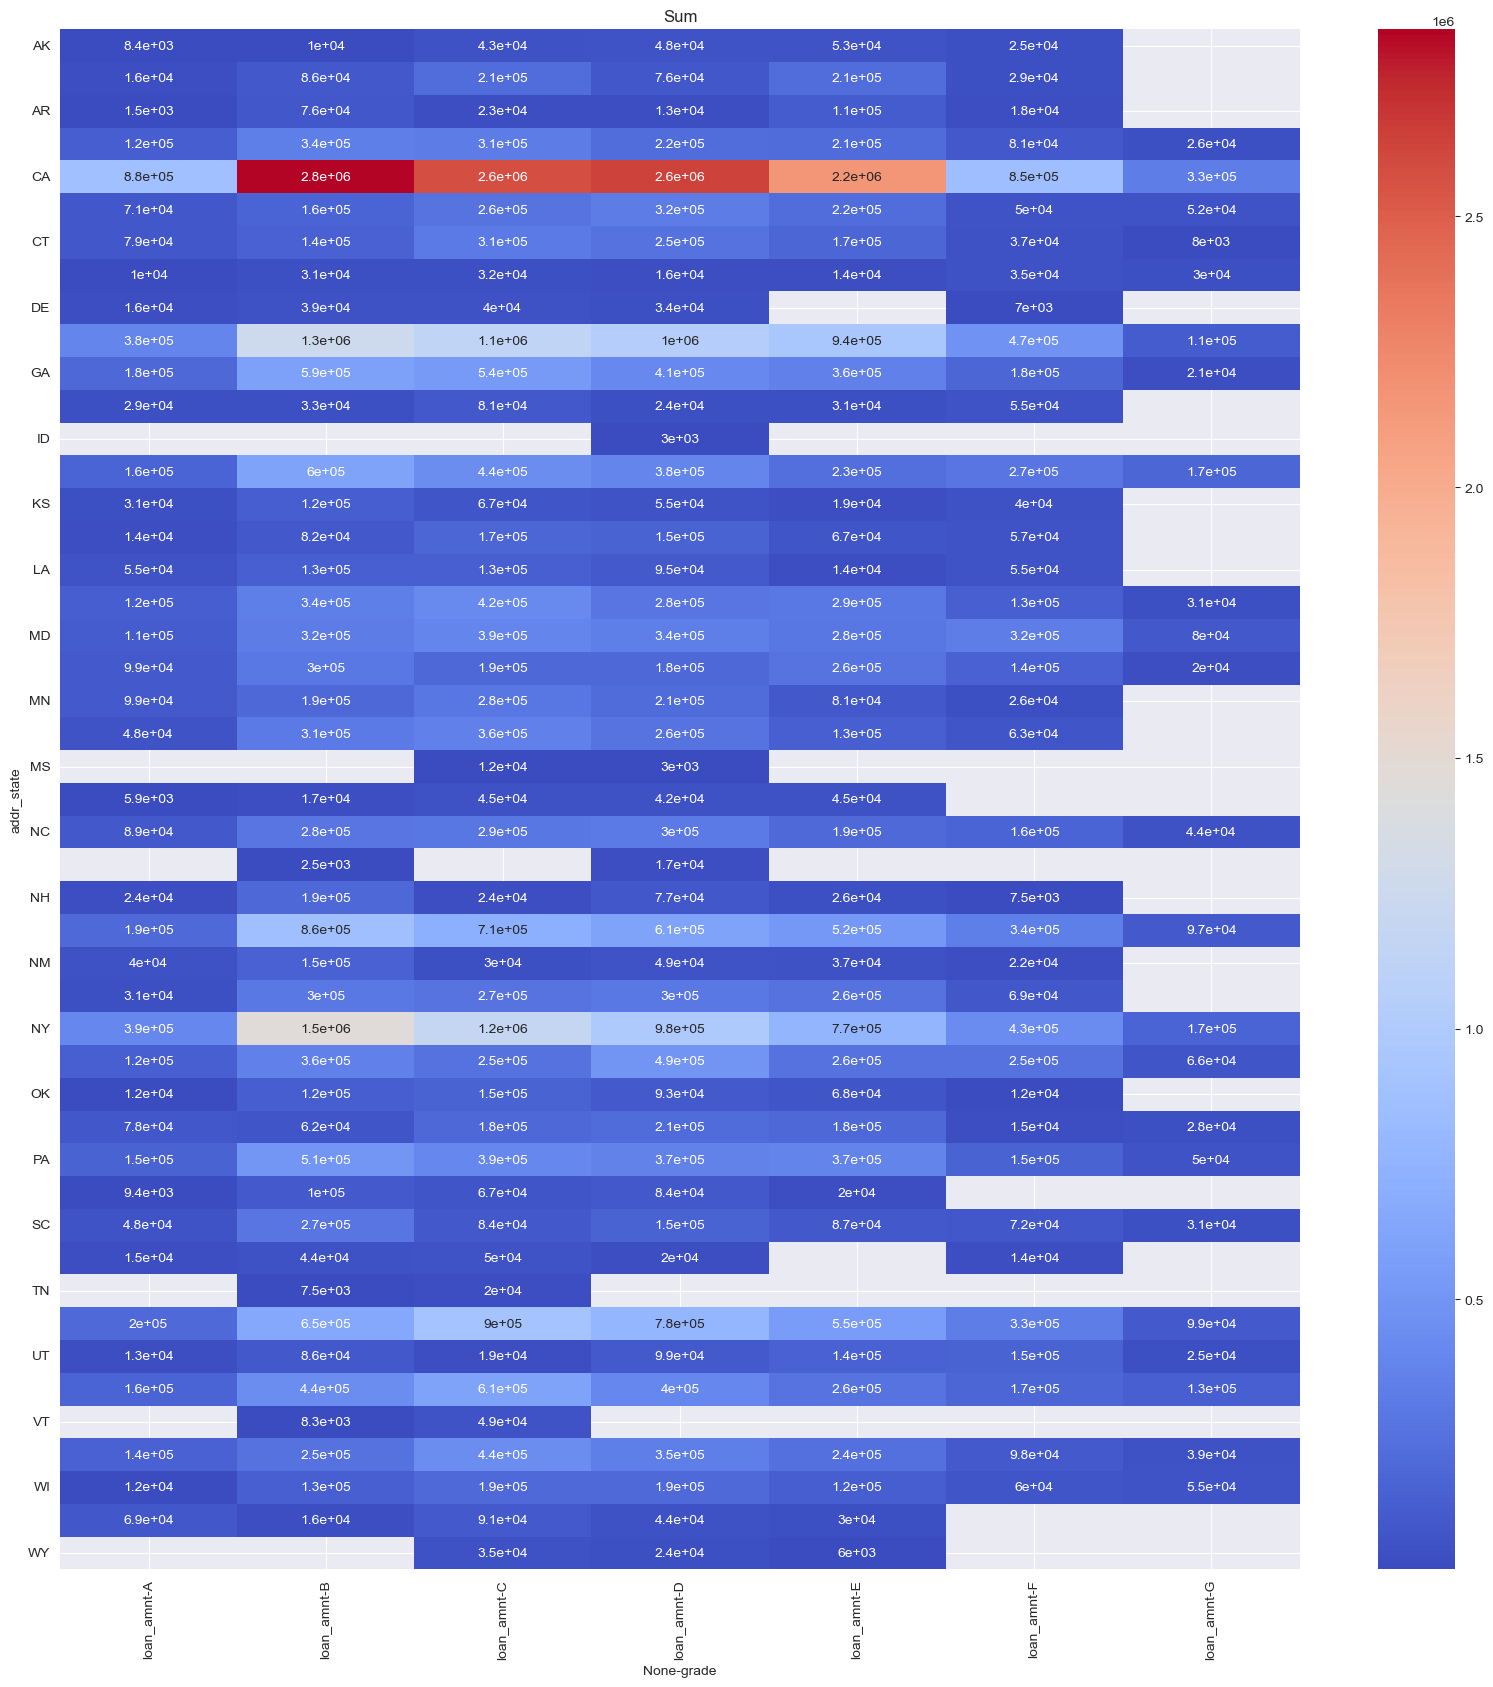

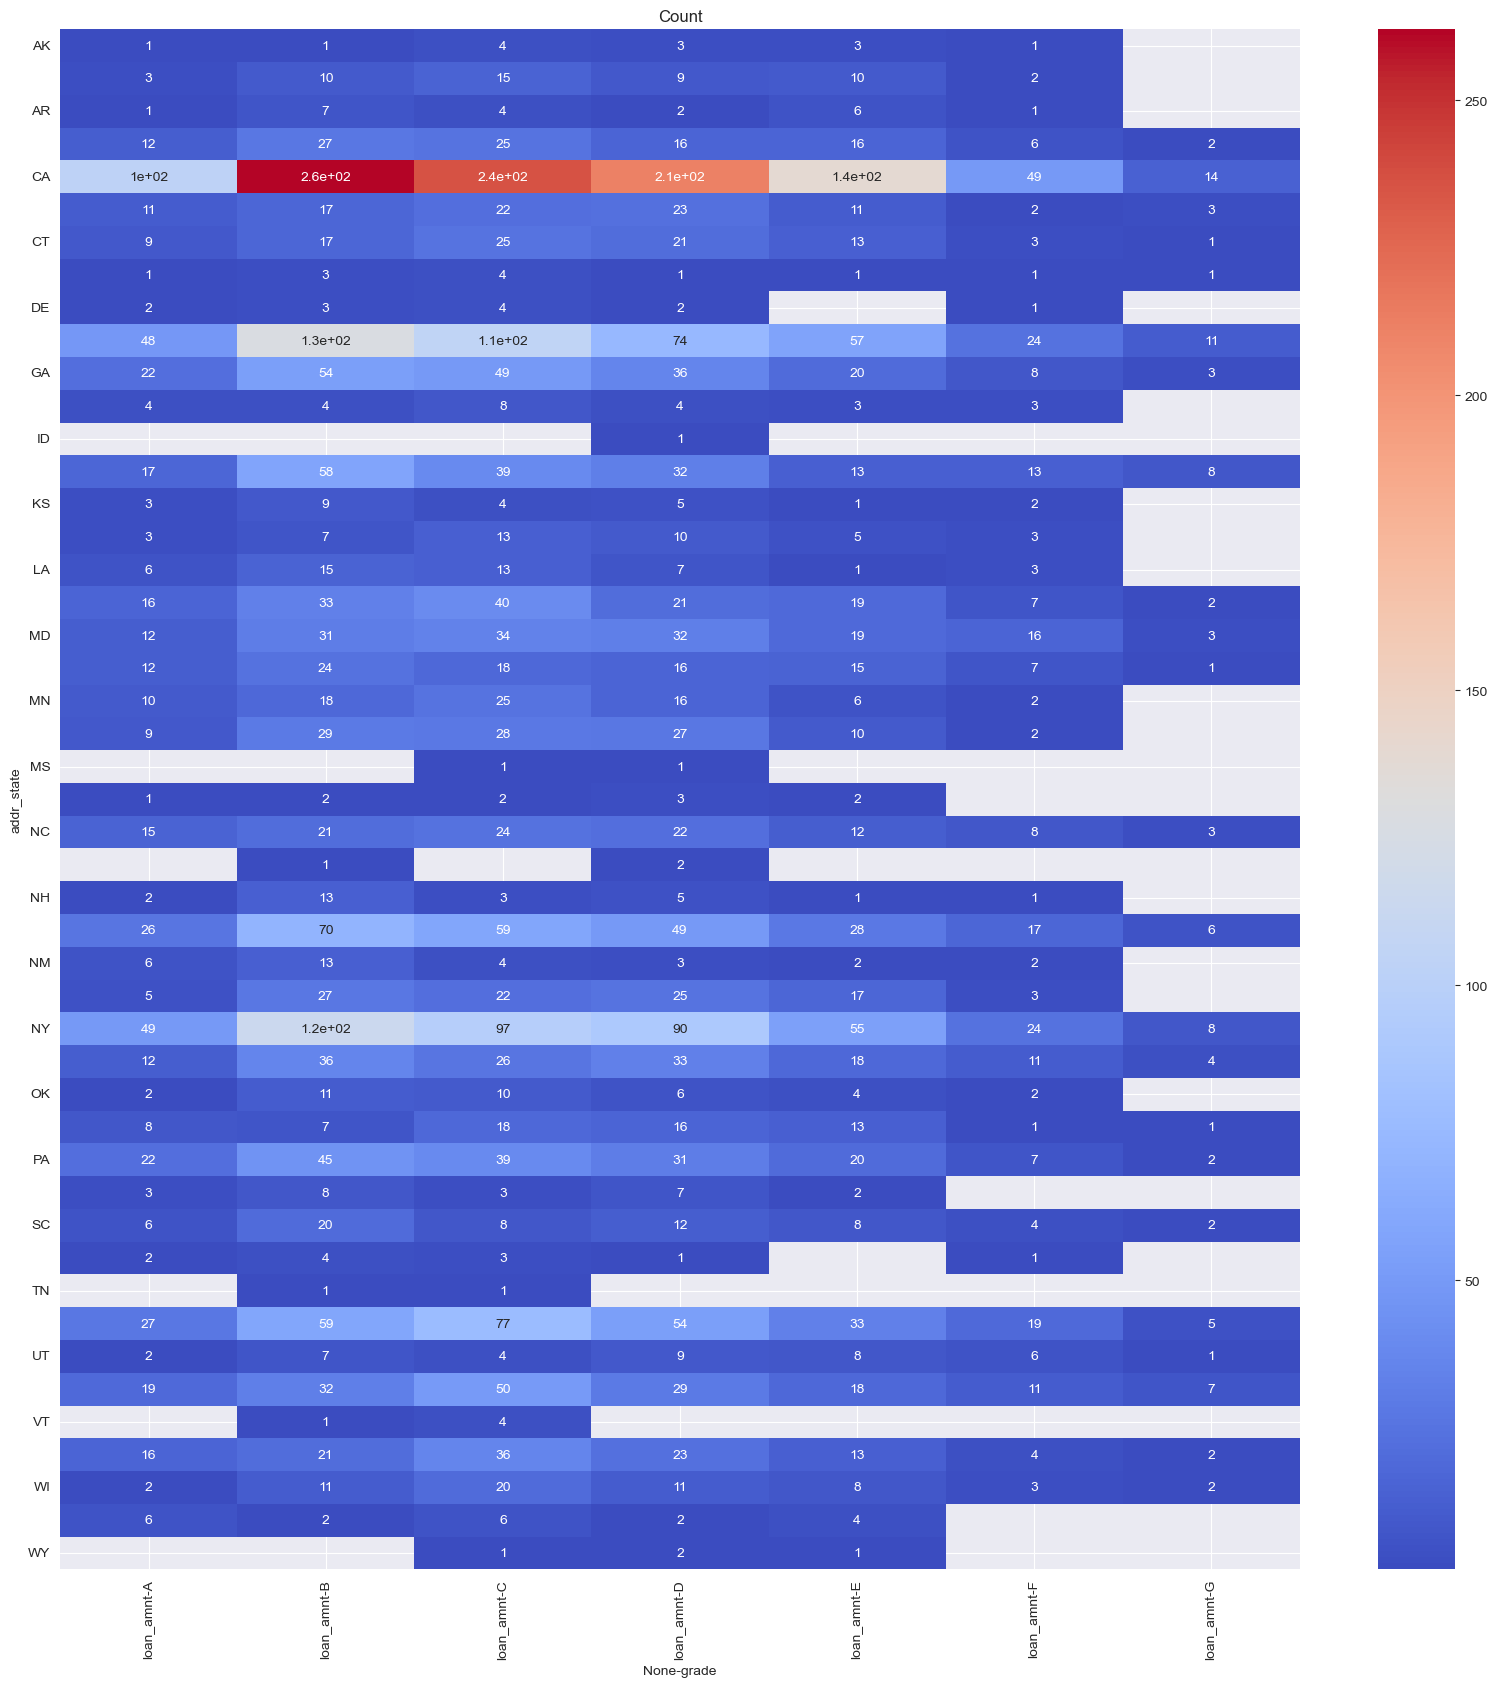

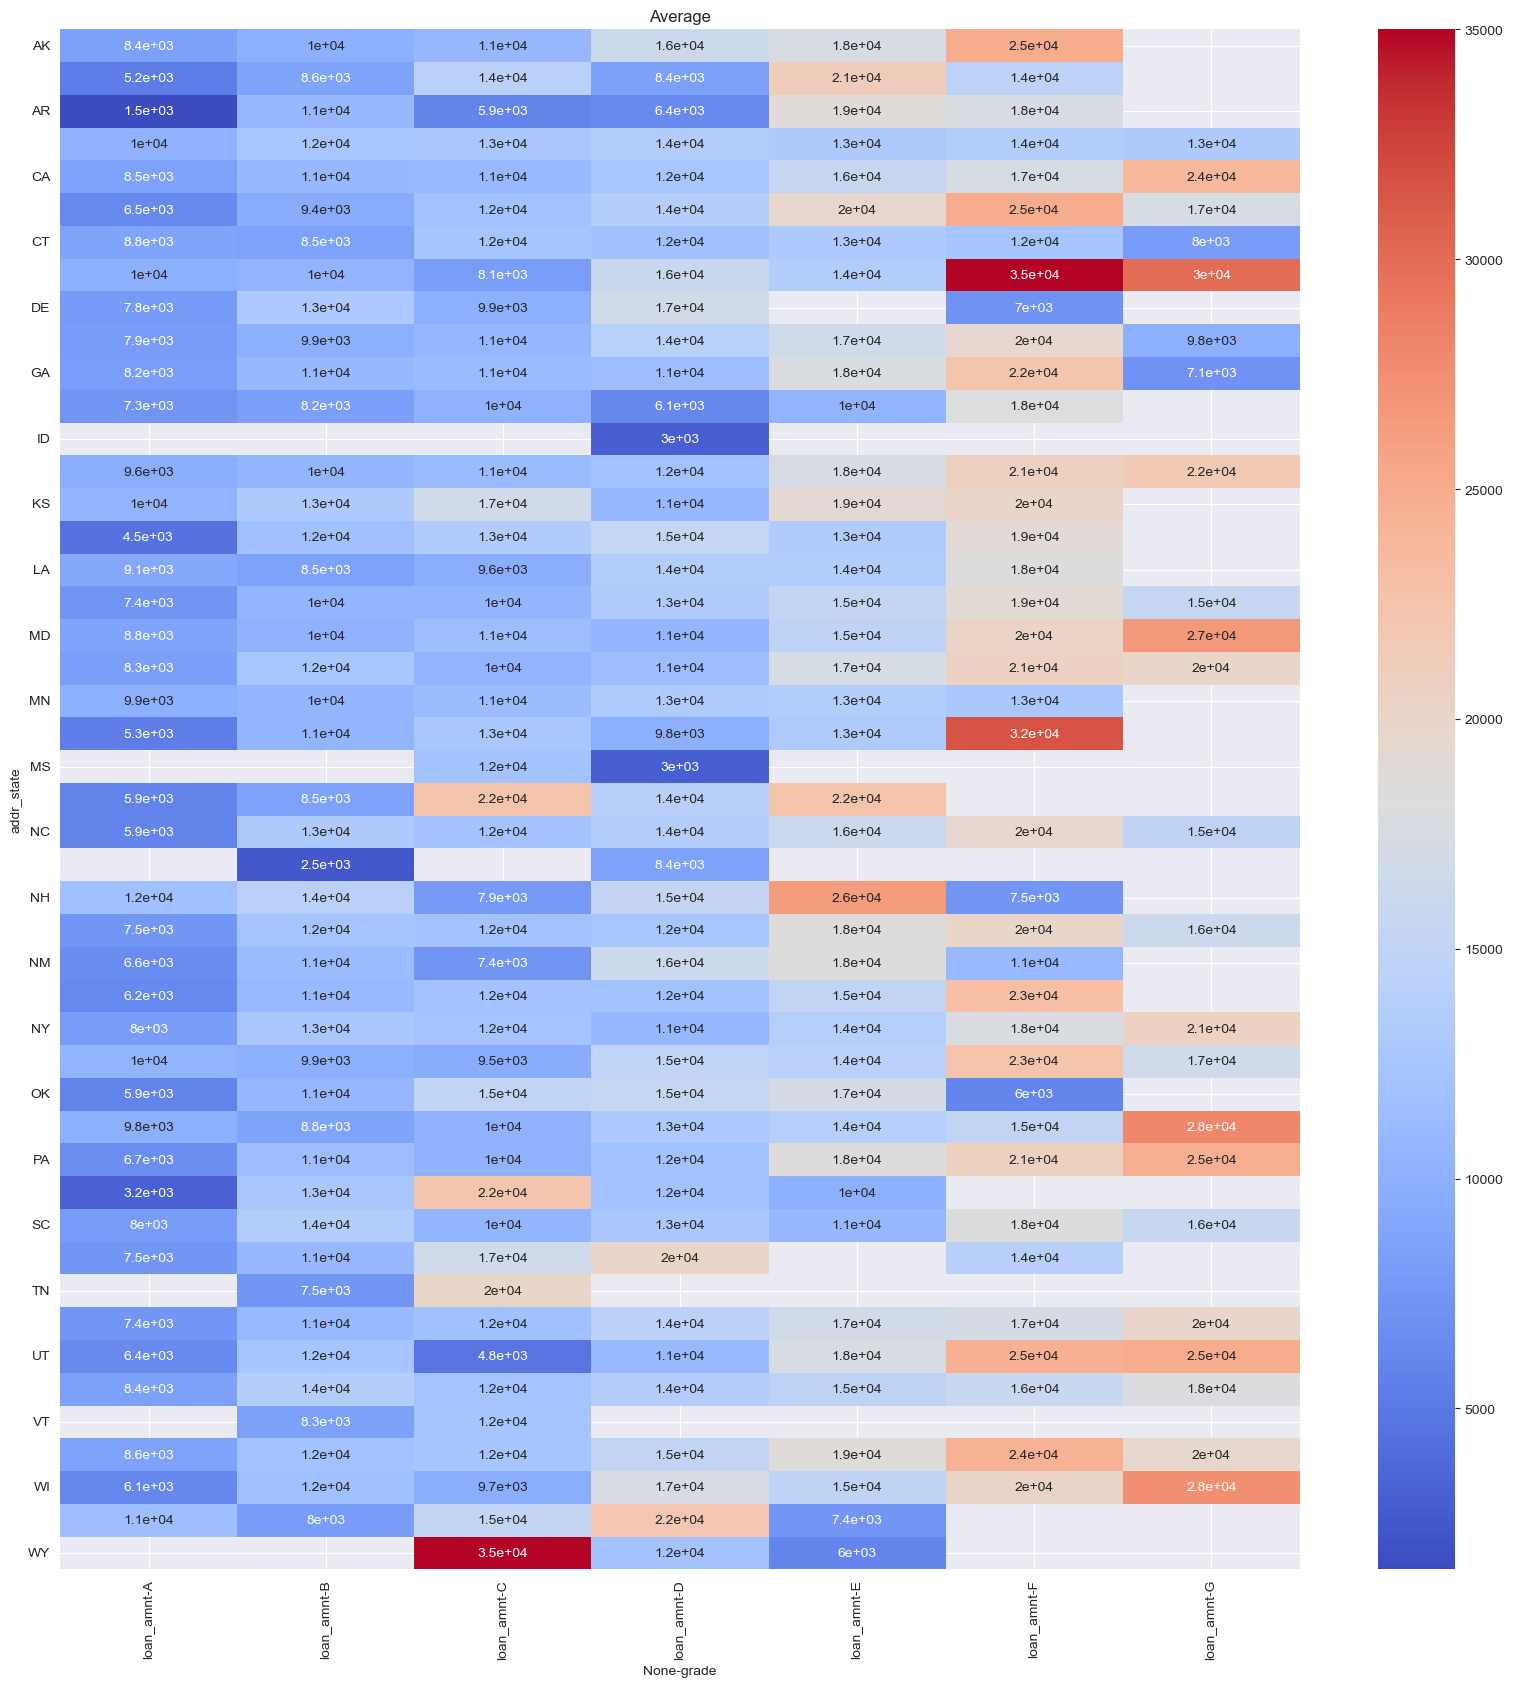

In [643]:
pivot = pd.pivot_table(loan_default,index = 'addr_state',
         columns = 'grade', values = ['loan_amnt'], aggfunc = 'sum')
heatmap = sns.heatmap(pivot, annot=True,cmap = 'coolwarm')
plt.title('Sum')
fig = heatmap.get_figure()
fig.set_size_inches(20,20)
plt.show()

pivot = pd.pivot_table(loan_default,index = 'addr_state',
         columns = 'grade', values = ['loan_amnt'], aggfunc = 'count')
heatmap = sns.heatmap(pivot, annot=True,cmap = 'coolwarm')
plt.title('Count')
fig = heatmap.get_figure()
fig.set_size_inches(20,20)
plt.show()

pivot = pd.pivot_table(loan_default,index = 'addr_state',
         columns = 'grade', values = ['loan_amnt'], aggfunc = 'mean')
heatmap = sns.heatmap(pivot, annot=True,cmap = 'coolwarm')
plt.title('Average')
fig = heatmap.get_figure()
fig.set_size_inches(20,20)
plt.show()

In [620]:
pd.pivot_table(loan_default,index = 'grade',
         columns = 'dti_cats', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                              mean  \
         loan_amnt                                         loan_amnt   
dti_cats       0-5    05-10    10-15    15-20      25+           0-5   
grade                                                                  
A           506625  1052750   991300   939025   596925   7342.391304   
B          1946075  2470250  3543250  3392650  2481825  12555.322581   
C           953750  2385675  3441825  3576150  3338325   8592.342342   
D           906400  2134600  3446675  3337750  2668675   9746.236559   
E           585675  1488225  2618625  2906925  2419800  11262.980769   
F           342000   679825  1338475  1848425  1079025  13153.846154   
G           187550   337875   250775   448850   486200  15629.166667   

                                                                     count  \
                                                                 loan_amnt   
dti_cats         05-10         10-15         15-20           25+       0-5   
grade                                                                        
A          8997.863248   8125.409836   8165.434783   7279.573171        69   
B         11543.224299  11504.058442  10280.757576  10088.719512       155   
C         12110.025381  11247.794118  11462.019231  11672.465035       111   
D         11793.370166  12908.895131  13458.669355  13017.926829        93   
E         15832.180851  15774.849398  16706.465517  16350.000000        52   
F         16186.309524  19121.071429  20768.820225  20358.962264        26   
G         17782.894737  14751.470588  21373.809524  21139.130435        12   

                                 
                                 
dti_cats 05-10 10-15 15-20  25+  
grade                            
A          117   122   115   82  
B          214   308   330  246  
C          197   306   312  286  
D          181   267   248  205  
E           94   166   174  148  
F           42    70    89   53  
G           19    17    21   23

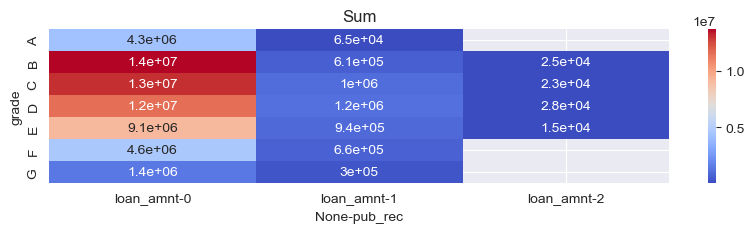

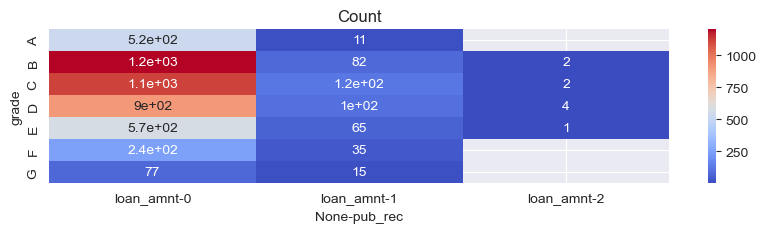

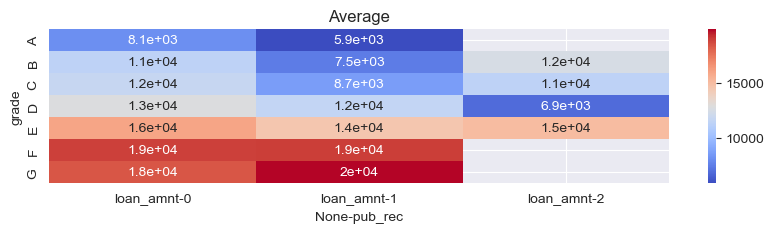

In [651]:
pivot = pd.pivot_table(loan_default,index = 'grade',
         columns = 'pub_rec', values = ['loan_amnt'], aggfunc = 'sum')
heatmap = sns.heatmap(pivot, annot=True,cmap = 'coolwarm')
plt.title('Sum')
fig = heatmap.get_figure()
fig.set_size_inches(10,2)
plt.show()

pivot = pd.pivot_table(loan_default,index = 'grade',
         columns = 'pub_rec', values = ['loan_amnt'], aggfunc = 'count')
heatmap = sns.heatmap(pivot, annot=True,cmap = 'coolwarm')
plt.title('Count')
fig = heatmap.get_figure()
fig.set_size_inches(10,2)
plt.show()

pivot = pd.pivot_table(loan_default,index = 'grade',
         columns = 'pub_rec', values = ['loan_amnt'], aggfunc = 'mean')
heatmap = sns.heatmap(pivot, annot=True,cmap = 'coolwarm')
plt.title('Average')
fig = heatmap.get_figure()
fig.set_size_inches(10,2)
plt.show()


## Subgrade and other columns 

In [593]:
pd.pivot_table(loan_default,index = 'sub_grade',
         columns = 'grade', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                                         \
           loan_amnt                                                          
grade              A          B          C          D          E          F   
sub_grade                                                                     
A1          204200.0        NaN        NaN        NaN        NaN        NaN   
A2          479600.0        NaN        NaN        NaN        NaN        NaN   
A3          749700.0        NaN        NaN        NaN        NaN        NaN   
A4         1274800.0        NaN        NaN        NaN        NaN        NaN   
A5         1612875.0        NaN        NaN        NaN        NaN        NaN   
B1               NaN  1396000.0        NaN        NaN        NaN        NaN   
B2               NaN  1952625.0        NaN        NaN        NaN        NaN   
B3               NaN  3499475.0        NaN        NaN        NaN        NaN   
B4               NaN  3472000.0        NaN        NaN        NaN        NaN   
B5               NaN  3963925.0        NaN        NaN        NaN        NaN   
C1               NaN        NaN  3650225.0        NaN        NaN        NaN   
C2               NaN        NaN  3368275.0        NaN        NaN        NaN   
C3               NaN        NaN  2791400.0        NaN        NaN        NaN   
C4               NaN        NaN  2190800.0        NaN        NaN        NaN   
C5               NaN        NaN  2109150.0        NaN        NaN        NaN   
D1               NaN        NaN        NaN  1481275.0        NaN        NaN   
D2               NaN        NaN        NaN  2709875.0        NaN        NaN   
D3               NaN        NaN        NaN  3190850.0        NaN        NaN   
D4               NaN        NaN        NaN  2614300.0        NaN        NaN   
D5               NaN        NaN        NaN  2715475.0        NaN        NaN   
E1               NaN        NaN        NaN        NaN  2670600.0        NaN   
E2               NaN        NaN        NaN        NaN  2238075.0        NaN   
E3               NaN        NaN        NaN        NaN  1542025.0        NaN   
E4               NaN        NaN        NaN        NaN  1843625.0        NaN   
E5               NaN        NaN        NaN        NaN  1729925.0        NaN   
F1               NaN        NaN        NaN        NaN        NaN  1473900.0   
F2               NaN        NaN        NaN        NaN        NaN  1193750.0   
F3               NaN        NaN        NaN        NaN        NaN   815225.0   
F4               NaN        NaN        NaN        NaN        NaN   845300.0   
F5               NaN        NaN        NaN        NaN        NaN   959575.0   
G1               NaN        NaN        NaN        NaN        NaN        NaN   
G2               NaN        NaN        NaN        NaN        NaN        NaN   
G3               NaN        NaN        NaN        NaN        NaN        NaN   
G4               NaN        NaN        NaN        NaN        NaN        NaN   
G5               NaN        NaN        NaN        NaN        NaN        NaN   

                            mean                                            \
                       loan_amnt                                             
grade             G            A             B             C             D   
sub_grade                                                                    
A1              NaN  7562.962963           NaN           NaN           NaN   
A2              NaN  7052.941176           NaN           NaN           NaN   
A3              NaN  7975.531915           NaN           NaN           NaN   
A4              NaN  8119.745223           NaN           NaN           NaN   
A5              NaN  8488.815789           NaN           NaN           NaN   
B1              NaN          NaN   9124.183007           NaN           NaN   
B2              NaN          NaN   9812.185930           NaN           NaN   
B3              NaN          NaN  11549.422442           NaN           NaN   

In [655]:
pd.pivot_table(loan_default,index = 'grade',
         columns = 'home_ownership', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])


sum                                         mean  \
                loan_amnt                                    loan_amnt   
home_ownership   MORTGAGE    OTHER        OWN       RENT      MORTGAGE   
grade                                                                    
A               2166025.0  26200.0   360625.0  1768325.0   8595.337302   
B               6811450.0  64150.0  1019150.0  6389275.0  12185.062612   
C               6721750.0  30000.0   949775.0  6408325.0  13026.647287   
D               5850425.0  56500.0   891125.0  5913725.0  14517.183623   
E               4920700.0  25600.0   714275.0  4363675.0  18498.872180   
F               2759500.0  25000.0   348000.0  2155250.0  21064.885496   
G                713600.0      NaN   231925.0   765725.0  19286.486486   

                                                        count              \
                                                    loan_amnt               
home_ownership    OTHER           OWN          RENT  MORTGAGE OTHER   OWN   
grade                                                                       
A               13100.0   8013.888889   7461.286920     252.0   2.0  45.0   
B               12830.0  10506.701031  10255.658106     559.0   5.0  97.0   
C               15000.0  10323.641304  10269.751603     516.0   2.0  92.0   
D               11300.0  13104.779412  11157.971698     403.0   5.0  68.0   
E               12800.0  14880.729167  13679.231975     266.0   2.0  48.0   
F               25000.0  16571.428571  16970.472441     131.0   1.0  21.0   
G                   NaN  23192.500000  17016.111111      37.0   NaN  10.0   

                       
                       
home_ownership   RENT  
grade                  
A               237.0  
B               623.0  
C               624.0  
D               530.0  
E               319.0  
F               127.0  
G                45.0

In [661]:
pd.pivot_table(loan_default,index = 'dti_cats',
         columns = 'annual_inc_cats', values = ['loan_amnt'], aggfunc = ['sum','mean','count'])

sum                                               \
                loan_amnt                                                
annual_inc_cats   0-20000 20000-40000 40000-60000 60000-80000  80000 +   
dti_cats                                                                 
0-5                     0      958100     1656150      948150  1865675   
05-10                   0     1831625     2871350     2622350  3223875   
10-15                   0     2830900     4844375     3814250  4141400   
15-20                   0     2930675     5491875     4108100  3919125   
25+                     0     2879900     4666775     2917875  2606225   

                        mean                                            \
                   loan_amnt                                             
annual_inc_cats  20000-40000   40000-60000   60000-80000       80000 +   
dti_cats                                                                 
0-5              6653.472222   9304.213483  11154.705882  16807.882883   
05-10            8176.897321  10835.283019  13587.305699  17713.598901   
10-15            8657.186544  11589.413876  14285.580524  16972.950820   
15-20            8594.354839  12070.054945  15328.731343  17418.333333   
25+              8780.182927  12345.965608  15040.592784  18225.349650   

                    count                                              
                loan_amnt                                              
annual_inc_cats   0-20000 20000-40000 40000-60000 60000-80000 80000 +  
dti_cats                                                               
0-5                     0         144         178          85     111  
05-10                   0         224         265         193     182  
10-15                   0         327         418         267     244  
15-20                   0         341         455         268     225  
25+                     0         328         378         194     143

In [663]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [669]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("seaborn version:", sns.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
seaborn version: 0.13.2
